In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io 
from sklearn.linear_model import Ridge, LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, RobustScaler
from numpy import absolute
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from numpy.linalg import inv
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestRegressor
from numpy.linalg import inv
import matplotlib.ticker as mtick
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates
from itertools import cycle, islice
%matplotlib inline

In [7]:
# Changing to the directry containing the dataset
%cd /content/drive/MyDrive/Applied ML Project

/content/drive/.shortcut-targets-by-id/1ObUAsTAeDns2wd4LQ4j3G5GdjtZz71nt/Applied ML Project


In [ ]:
# Suppressing warnings 
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

# Data

Importing the dataset

In [8]:
# Importing dataset 
df = pd.read_csv('states_all.csv')

In [ ]:
# Checking the column names
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [ ]:
# Analysing the dataset by checking its null value numbers by column
df.isna().sum()*100/df.shape[0]

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          28.629738
TOTAL_REVENUE                   25.655977
FEDERAL_REVENUE                 25.655977
STATE_REVENUE                   25.655977
LOCAL_REVENUE                   25.655977
TOTAL_EXPENDITURE               25.655977
INSTRUCTION_EXPENDITURE         25.655977
SUPPORT_SERVICES_EXPENDITURE    25.655977
OTHER_EXPENDITURE               28.629738
CAPITAL_OUTLAY_EXPENDITURE      25.655977
GRADES_PK_G                     10.087464
GRADES_KG_G                      4.839650
GRADES_4_G                       4.839650
GRADES_8_G                       4.839650
GRADES_12_G                      4.839650
GRADES_1_8_G                    40.524781
GRADES_9_12_G                   37.551020
GRADES_ALL_G                     4.839650
AVG_MATH_4_SCORE                67.055394
AVG_MATH_8_SCORE                64.897959
AVG_READING_4_SCORE             62

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,1715.0,2.002075e+03,9.568621e+00,1986.0,1994.00,2002.0,2010.00,2019.0
ENROLL,1224.0,9.175416e+05,1.066514e+06,43866.0,264514.50,649933.5,1010532.00,6307022.0
TOTAL_REVENUE,1275.0,9.102045e+06,1.175962e+07,465650.0,2189503.50,5085826.0,10845163.00,89217262.0
FEDERAL_REVENUE,1275.0,7.677799e+05,1.146992e+06,31020.0,189957.50,403548.0,827932.00,9990221.0
STATE_REVENUE,1275.0,4.223743e+06,5.549735e+06,0.0,1165776.00,2537754.0,5055547.50,50904567.0
LOCAL_REVENUE,1275.0,4.110522e+06,5.489562e+06,22093.0,715121.00,2058996.0,4755293.00,36105265.0
TOTAL_EXPENDITURE,1275.0,9.206242e+06,1.199279e+07,481665.0,2170404.00,5242672.0,10744201.50,85320133.0
INSTRUCTION_EXPENDITURE,1275.0,4.768010e+06,6.300569e+06,265549.0,1171336.50,2658253.0,5561959.00,43964520.0
SUPPORT_SERVICES_EXPENDITURE,1275.0,2.682587e+06,3.357214e+06,139963.0,638076.00,1525471.0,3222924.50,26058021.0
OTHER_EXPENDITURE,1224.0,4.299509e+05,5.347893e+05,11541.0,103449.25,271704.0,517222.25,3995951.0


In [9]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [13]:
# Robust Scaling
robust_scaler = RobustScaler(with_centering=True)

cols = ['YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

# Not applying Robust Scaler to PRIMARY_KEY (will be dropped eventually) and STATE (will be target encoded)
df[cols] = robust_scaler.fit_transform(df[cols])

# Exploratory Data Analysis on the Dataset

## Part 1

Text(0, 0.5, 'YEAR')

<Figure size 1440x432 with 0 Axes>

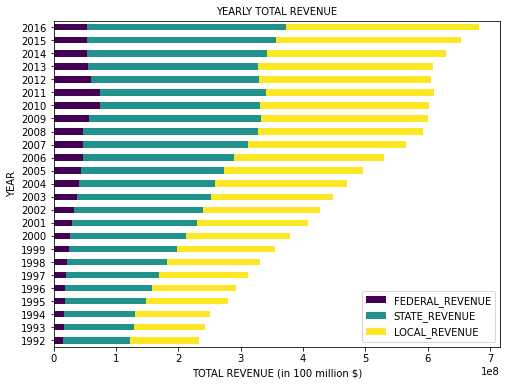

In [ ]:
# Plotting the breakdown of revenue over years
df_revenue = df[["YEAR", 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE']].dropna(axis = 0)

plt.figure(figsize=(20,6))
ax = df_revenue.groupby("YEAR").sum().plot.barh(x='TOTAL_REVENUE', stacked=True, cmap = 'viridis', figsize=(8,6))
ax.set_title('YEARLY TOTAL REVENUE', fontsize=10)
ax.set_yticklabels(list(range(1992, 2017)), rotation=0)
ax.set_xlabel("TOTAL REVENUE (in 100 million $)")
ax.set_ylabel("YEAR")

Text(0, 0.5, 'LOCAL REVENUE (in 10 million $)')

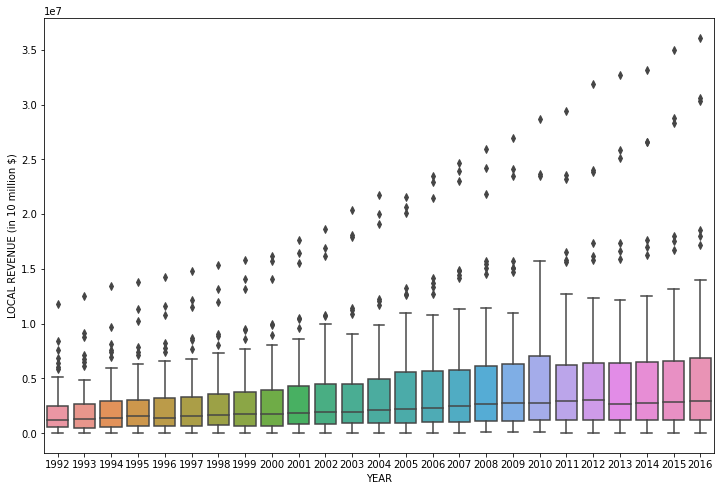

In [ ]:
# Plotting a boxplot of the distribution of local revenue over years
plt.figure(figsize = (12,8))
sns.boxplot(y = df_revenue['LOCAL_REVENUE'], x = df_revenue['YEAR'])
plt.ylabel("LOCAL REVENUE (in 10 million $)")

In [ ]:
num_features = []
target_var = [ 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']
cat_features = ["PRIMARY_KEY","STATE","YEAR"]
for col in df.columns:
    num_features.append(col)

num_features = [x for x in num_features if x not in cat_features and x not in target_var]
num_features

['ENROLL',
 'TOTAL_REVENUE',
 'FEDERAL_REVENUE',
 'STATE_REVENUE',
 'LOCAL_REVENUE',
 'TOTAL_EXPENDITURE',
 'INSTRUCTION_EXPENDITURE',
 'SUPPORT_SERVICES_EXPENDITURE',
 'OTHER_EXPENDITURE',
 'CAPITAL_OUTLAY_EXPENDITURE',
 'GRADES_PK_G',
 'GRADES_KG_G',
 'GRADES_4_G',
 'GRADES_8_G',
 'GRADES_12_G',
 'GRADES_1_8_G',
 'GRADES_9_12_G',
 'GRADES_ALL_G']

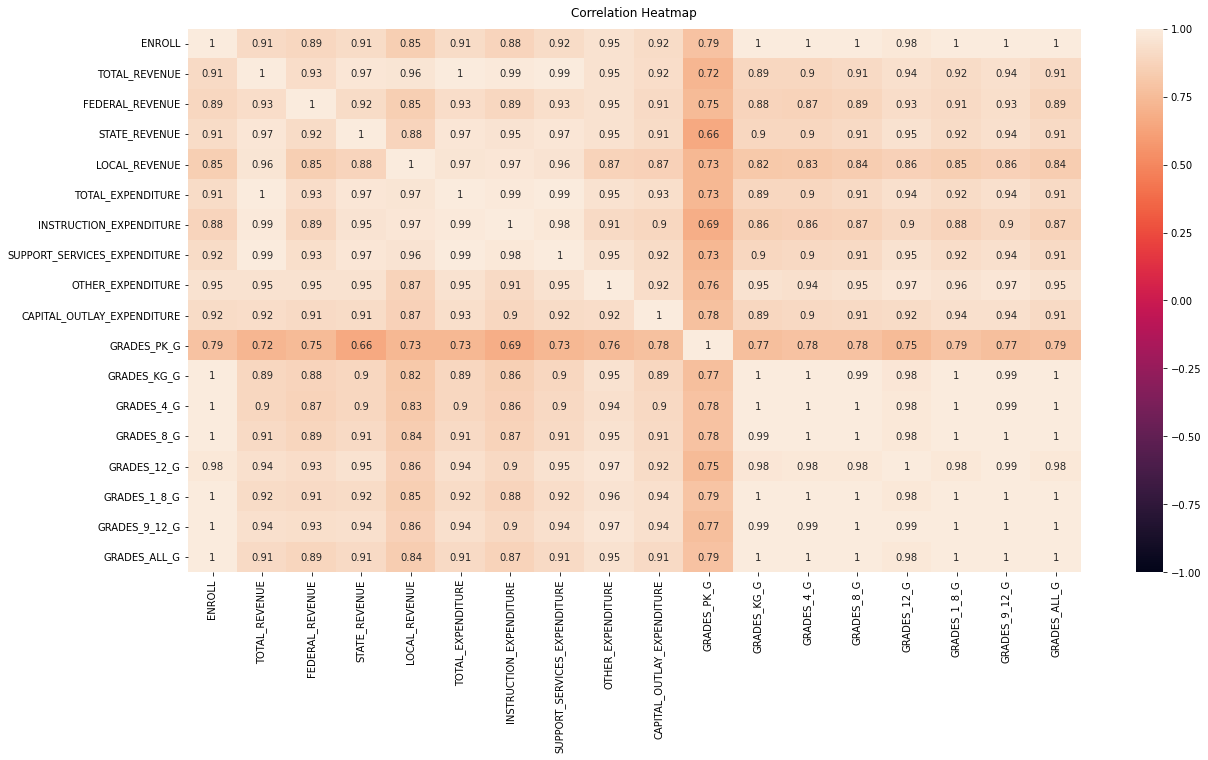

In [ ]:
# Correlation heatmap
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df[num_features].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
# Creating a new column EXPENDITURE_PER_ENROLLMENT in order to target encode STATE column based on it

In [ ]:
df["EXPENDITURE_PER_ENROLLMENT"] = df["TOTAL_EXPENDITURE"]/df["ENROLL"]

In [ ]:
# Dropping highly correlated features
CorrM = df[num_features].corr().abs()
upper_tri = CorrM.where(np.triu(np.ones(CorrM.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.97)]
df = df.drop(df[to_drop], axis=1, inplace=False)
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,LOCAL_REVENUE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EXPENDITURE_PER_ENROLLMENT
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,715680.0,NaN,174053.0,8224.0,208.0,252.0,207.0,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,222100.0,NaN,37451.0,2371.0,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1590376.0,NaN,609114.0,2544.0,215.0,265.0,209.0,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,574603.0,NaN,145212.0,808.0,210.0,256.0,211.0,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,7641041.0,NaN,2044688.0,59067.0,208.0,261.0,202.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0,NaN
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0,NaN
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0,NaN
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0,NaN


In [ ]:
# Mean imputation of missing values from the corresponding group of records from the associated state
for column in df.columns[3:]:
  df[column] = df[column].fillna(df.groupby('STATE')[column].transform('mean'))
df.dropna(axis=0, inplace=True)

In [ ]:
# Performing target encoding of the state column using the mean of the EXPENDITURE_PER_ENROLLMENT column for the corresponding state 
df["STATE"] = df.groupby("STATE")["EXPENDITURE_PER_ENROLLMENT"].transform("mean")

In [ ]:
updated_num = []

target_var = [ 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']
cat_features = ["PRIMARY_KEY","STATE","YEAR"]
for col in df.columns:
    updated_num.append(col)

updated_num = [x for x in updated_num if x not in cat_features and x not in target_var]
updated_num

['ENROLL',
 'TOTAL_REVENUE',
 'FEDERAL_REVENUE',
 'LOCAL_REVENUE',
 'OTHER_EXPENDITURE',
 'CAPITAL_OUTLAY_EXPENDITURE',
 'GRADES_PK_G',
 'EXPENDITURE_PER_ENROLLMENT']

In [ ]:
# Calculating the TOTAL_SCORE column, i.e, the sum of the AVG scores
df["TOTAL_SCORE"] = df.apply(lambda x: x['AVG_MATH_4_SCORE'] + x['AVG_MATH_8_SCORE'] + x['AVG_READING_4_SCORE'] + x['AVG_READING_8_SCORE'], axis = 1)

# Dropping PRIMARY KEY column as its not used for training
df.drop("PRIMARY_KEY", axis = 1, inplace=True)

In [ ]:
# Saving the final dataset after cleaning, imputation and encoding
df.to_csv("us_education_final.csv", index=False) 

In [ ]:
# df = pd.read_csv("us_education_final.csv")

## Part 2

In [ ]:
data = pd.read_csv('states_all.csv')
pd.set_option('display.max_columns', None)
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [ ]:
data.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

### Plot histogram for the top 10 states with the highest accumlated total expenditures

In [ ]:
year = data['YEAR'].unique()
state = data['STATE'].unique()

Checking for missing values in TOTAL_EXPENDITURE.

In [ ]:
print(data['TOTAL_EXPENDITURE'].isnull().values.any())
print(data['ENROLL'].isnull().values.any())

True
True


In [ ]:
data['ENROLL']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1710   NaN
1711   NaN
1712   NaN
1713   NaN
1714   NaN
Name: ENROLL, Length: 1715, dtype: float64

In [ ]:
year_state_exp = data[['YEAR', 'STATE','TOTAL_EXPENDITURE', 'ENROLL']]
year_state_exp = year_state_exp.drop(year_state_exp[(year_state_exp.YEAR <= 1992) | 
                                                    (year_state_exp.YEAR >= 2017) |
                                                    (year_state_exp.STATE == 'DODEA') |
                                                    (year_state_exp.STATE == 'NATIONAL')].index)
year_state_exp = year_state_exp.reset_index()
year_state_exp_summary = pd.DataFrame(columns = ['State', 'Sum_Expenditure', 'Sum_Enrollment'])
print(year_state_exp['TOTAL_EXPENDITURE'].isnull().values.any())

False


In [ ]:
for index, row in year_state_exp.iterrows():
    state = row['STATE']
    exp = row['TOTAL_EXPENDITURE']
    enroll = row['ENROLL']
    if state in year_state_exp_summary['State'].values:
        year_state_exp_summary.loc[year_state_exp_summary['State'] == state, 'Sum_Expenditure'] += exp
        year_state_exp_summary.loc[year_state_exp_summary['State'] == state, 'Sum_Enrollment'] += enroll
    else:
        df = {'State': state, 'Sum_Expenditure': exp, 'Sum_Enrollment': enroll}
        year_state_exp_summary = year_state_exp_summary.append(df, ignore_index = True)

In [ ]:
year_state_exp_summary.sort_values(by=['Sum_Expenditure'], inplace=True, ascending=False)
year_state_exp_summary

In [ ]:
top_10 = year_state_exp_summary[0:10]
last_10 = year_state_exp_summary[41:51]
last_10.sort_values(by=['Sum_Expenditure'], inplace=True, ascending=True)
top_10_states = list(top_10['State'])
last_10_states = list(last_10['State'])
labels = []
for i in range(len(top_10_states)):
    l = top_10_states[i] + ", " + last_10_states[i]
    labels.append(l)

/Users/xrachelpeng/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


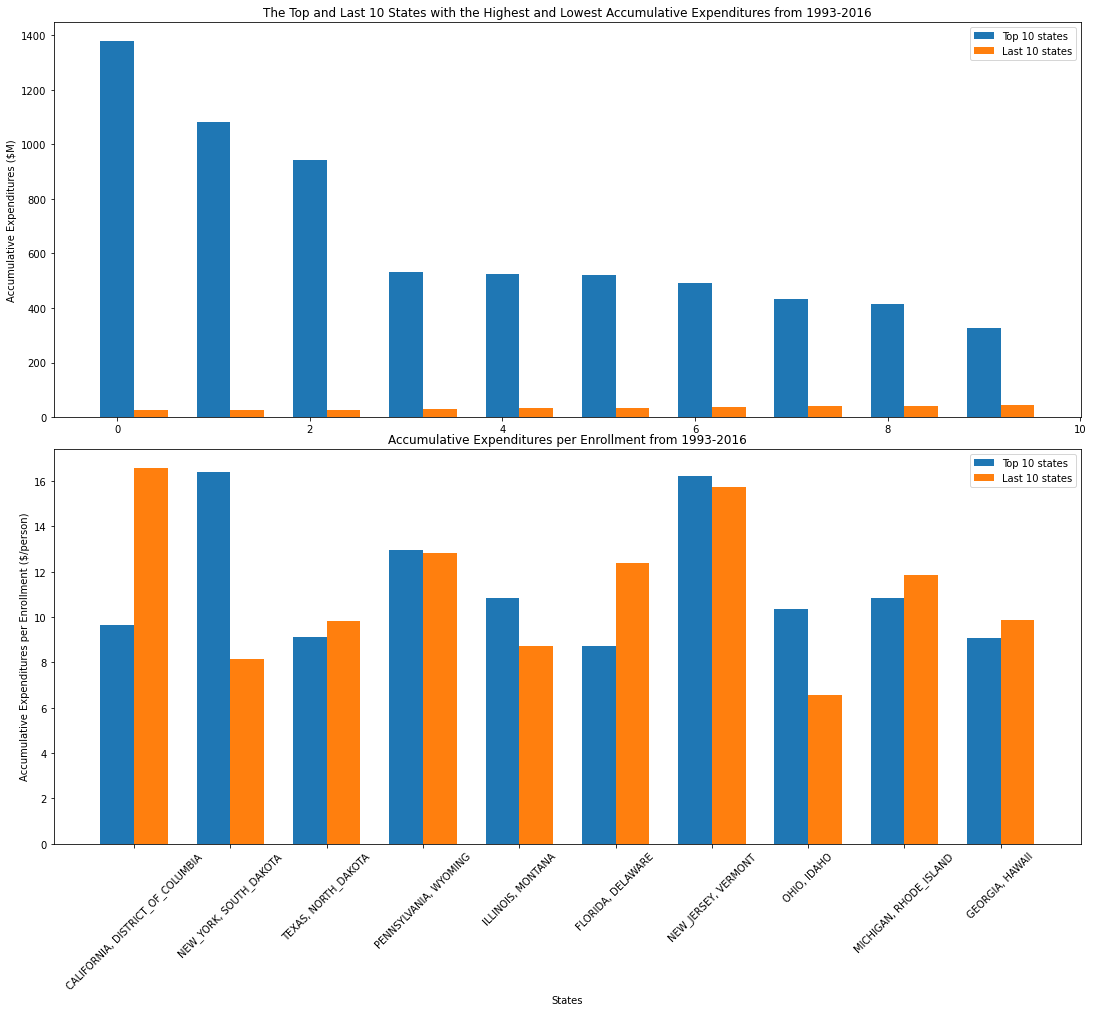

In [ ]:
fig, ax = plt.subplots(2, figsize=(15, 12))
fig.tight_layout()
index = np.arange(10)
top = ax[0].bar(index, top_10['Sum_Expenditure']/1e6, 0.35, label="Top 10 states")
last = ax[0].bar(index+0.35, last_10['Sum_Expenditure']/1e6, 0.35, label="Last 10 states")
top_e = ax[1].bar(index, (top_10['Sum_Expenditure'])/top_10['Sum_Enrollment'], 0.35, label="Top 10 states")
last_e = ax[1].bar(index+0.35, (last_10['Sum_Expenditure'])/last_10['Sum_Enrollment'], 0.35, label="Last 10 states")

ax[0].set_ylabel('Accumulative Expenditures ($M)')
ax[0].set_title('The Top and Last 10 States with the Highest and Lowest Accumulative Expenditures from 1993-2016')
ax[0].legend()
ax[1].set_xlabel('States')
ax[1].set_ylabel('Accumulative Expenditures per Enrollment ($/person)')
ax[1].set_title('Accumulative Expenditures per Enrollment from 1993-2016')
ax[1].set_xticks(index + 0.35 / 2)
ax[1].set_xticklabels(labels, rotation=45)
ax[1].legend()

plt.show()
fig.savefig('accumulated_enrollment.png', bbox_inches='tight')

In [ ]:
year_state_exp_summary['Exp_Enroll'] = year_state_exp_summary['Sum_Expenditure']/year_state_exp_summary['Sum_Enrollment']
year_state_exp_summary.sort_values(by=['Exp_Enroll'], inplace=True, ascending=False)
top_10_per = year_state_exp_summary[0:10]
top_labels = list(top_10_per['State'])
last_10_per = year_state_exp_summary[41:51]
year_state_exp_summary.sort_values(by=['Exp_Enroll'], inplace=True, ascending=True)
last_labels = list(last_10_per['State'])
per_labels = []
for i in range(len(top_labels)):
    l = top_labels[i] + ", " + last_labels[i]
    per_labels.append(l)
year_state_exp_summary


,State,Sum_Expenditure,Sum_Enrollment,Exp_Enroll
44,UTAH,7.897912e+07,12227383.0,6.459201
12,IDAHO,4.021385e+07,6132080.0,6.557946
24,MISSISSIPPI,8.293644e+07,11724554.0,7.073739
42,TENNESSEE,1.661595e+08,22374594.0,7.426256
36,OKLAHOMA,1.099698e+08,14701338.0,7.480259
2,ARIZONA,1.603411e+08,20983730.0,7.641213
0,ALABAMA,1.396032e+08,17678024.0,7.896990
33,NORTH_CAROLINA,2.573839e+08,31933146.0,8.060085
41,SOUTH_DAKOTA,2.477047e+07,3047278.0,8.128721
3,ARKANSAS,9.095013e+07,10845646.0,8.385865


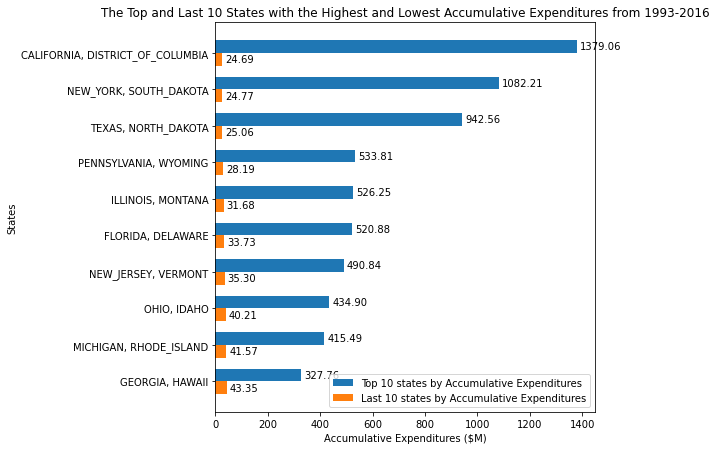

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
fig.tight_layout()
index = np.arange(10)
top = ax.barh(index, top_10['Sum_Expenditure']/1e6, 0.35, label="Top 10 states by Accumulative Expenditures")
last = ax.barh(index+0.35, last_10['Sum_Expenditure']/1e6, 0.35, label="Last 10 states by Accumulative Expenditures")
ax.invert_yaxis()
ax.set_ylabel('States')
ax.set_xlabel('Accumulative Expenditures ($M)')
ax.set_title('The Top and Last 10 States with the Highest and Lowest Accumulative Expenditures from 1993-2016')
ax.set_yticks(index + 0.35 / 2)
ax.set_yticklabels(labels)
ax.legend()
ax.bar_label(top, fmt = '%.2f', padding=3)
ax.bar_label(last, fmt = '%.2f', padding=3)
plt.show()
fig.savefig('accumulated_exp.png', bbox_inches='tight')

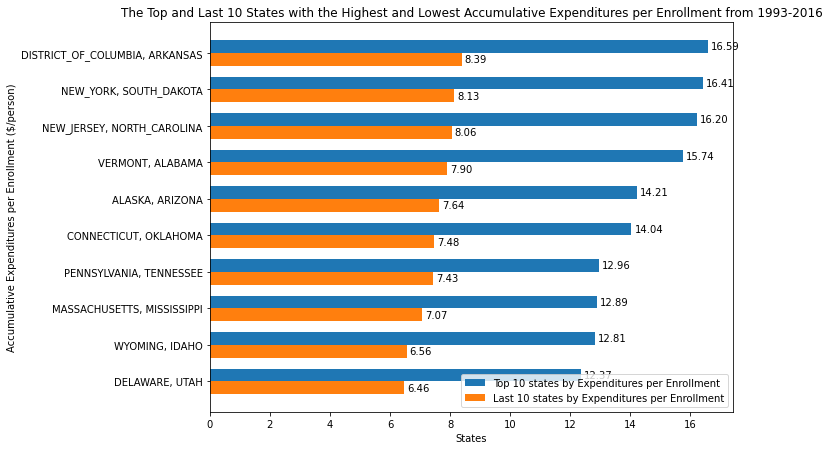

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.tight_layout()
top_e = ax.barh(index, top_10_per['Exp_Enroll'], 0.35, label="Top 10 states by Expenditures per Enrollment")
last_e = ax.barh(index+0.35, last_10_per['Exp_Enroll'], 0.35, label="Last 10 states by Expenditures per Enrollment")
ax.invert_yaxis()
ax.set_xlabel('States')
ax.set_ylabel('Accumulative Expenditures per Enrollment ($/person)')
ax.set_title('The Top and Last 10 States with the Highest and Lowest Accumulative Expenditures per Enrollment from 1993-2016')
ax.set_yticks(index + 0.35 / 2)
ax.set_yticklabels(per_labels)
ax.legend()
ax.bar_label(top_e, fmt = '%.2f', padding=3)
ax.bar_label(last_e, fmt = '%.2f',padding=3)
plt.show()
fig.savefig('exp_enroll.png', bbox_inches='tight')


Instruction expenditures
Expenditures for activities related to the interaction between teachers and students. Include salaries and benefits for teachers and teacher aides, textbooks, supplies and purchased services. These expenditures also include expenditures relating to extracurricular and cocurricular activities.

Support services expenditures
An expenditure function divided into seven subfunctions: student support services, instructional staff support, general administration, school administration, operations and maintenance, student transportation, and other support services.

Capital outlay expenditures
The capital outlay fund of the school district is a fund provided by law to meet expenditures of which result in the acquisition of or lease of or additions to real property, plant, or equipment.

sources: https://nces.ed.gov/pubs2011/expenditures/appendix_b.asp#:~:text=instruction%20expenditures,textbooks%2C%20supplies%20and%20purchased%20services.
https://legislativeaudit.sd.gov/resources/schools/accountingmanual/School_Section_12/School_Section%2012_Interpretation_13.pdf

### Compare grades among the top and last 10 states

In [ ]:
year_exp_grades = data[['YEAR', 'STATE','TOTAL_EXPENDITURE', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 
                       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']]
year_exp_grades = year_exp_grades.drop(year_exp_grades[(year_exp_grades.YEAR <= 1992) | 
                                                    (year_exp_grades.YEAR >= 2017) |
                                                    (year_exp_grades.STATE == 'DODEA') |
                                                    (year_exp_grades.STATE == 'NATIONAL')].index)
year_exp_grades = year_exp_grades.reset_index()
year_exp_grades = year_exp_grades.dropna(subset=['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 
                                                 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'])
year_exp_grades

,index,YEAR,STATE,TOTAL_EXPENDITURE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
510,561,2003,ALABAMA,5298932.0,223.0,262.0,207.0,253.0
511,562,2003,ALASKA,1610289.0,233.0,279.0,212.0,256.0
512,563,2003,ARIZONA,6210287.0,229.0,271.0,209.0,255.0
513,564,2003,ARKANSAS,3242799.0,229.0,266.0,214.0,258.0
514,565,2003,CALIFORNIA,59749885.0,227.0,267.0,206.0,251.0
...,...,...,...,...,...,...,...,...
1168,1219,2015,VIRGINIA,16113212.0,247.0,288.0,229.0,267.0
1169,1220,2015,WASHINGTON,13630138.0,245.0,287.0,226.0,267.0
1170,1221,2015,WEST_VIRGINIA,3466981.0,235.0,271.0,216.0,260.0
1171,1222,2015,WISCONSIN,11553677.0,243.0,289.0,223.0,270.0


In [ ]:
year_exp_grades.isnull().values.any()

False

In [ ]:
year_exp_grades_summary = pd.DataFrame(columns = ['Year', 'Sum_Expenditure', 'Sum_Score'])

In [ ]:
for index, row in year_exp_grades.iterrows():
    year = row['YEAR']
    exp = row['TOTAL_EXPENDITURE']
    scores = row['AVG_MATH_4_SCORE'] + row['AVG_MATH_8_SCORE'] + row['AVG_READING_4_SCORE'] + row['AVG_READING_8_SCORE']
    if year in year_exp_grades_summary['Year'].values:
        year_exp_grades_summary.loc[year_exp_grades_summary['Year'] == year, 'Sum_Score'] += scores
        year_exp_grades_summary.loc[year_exp_grades_summary['Year'] == year, 'Sum_Expenditure'] += exp
    else:
        df = {'Year': year, 'Sum_Expenditure': exp, 'Sum_Score': scores}
        year_exp_grades_summary = year_exp_grades_summary.append(df, ignore_index = True)

In [ ]:
year_exp_grades_summary['Sum_Expenditure'] = year_exp_grades_summary['Sum_Expenditure']/650900851.0
year_exp_grades_summary['Sum_Score'] = year_exp_grades_summary['Sum_Score']/51676.0
year_exp_grades_summary

,Year,Sum_Expenditure,Sum_Score
0,2003.0,0.710208,0.977552
1,2005.0,0.778347,0.981578
2,2007.0,0.875179,0.989183
3,2009.0,0.947564,0.992298
4,2011.0,0.933477,0.995607
5,2013.0,0.934710,1.000000
6,2015.0,1.000000,0.995743


In [ ]:
years = list(year_exp_grades_summary['Year'])
years = [int(x) for x in years]

In [ ]:
import seaborn as sns

In [ ]:
fig, ax = plt.scatter(year_exp_grades_summary['Sum_Expenditure']/650900851.0, 
                      year_exp_grades_summary['Sum_Score']/51676.0)
ax.axline([0.85, 0.85], [1, 1])
for i, y in enumerate(years):
    ax.annotate(y, (year_exp_grades_summary['Sum_Expenditure'][i], year_exp_grades_summary['Sum_Score'][i]))
plt.show()

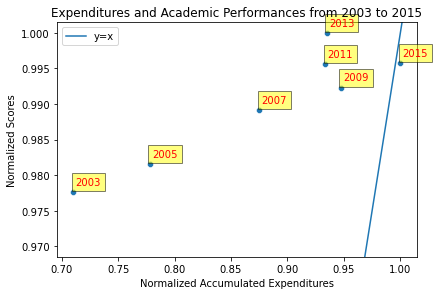

In [ ]:
sns.scatterplot(data=year_exp_grades_summary,x='Sum_Expenditure',y='Sum_Score')
plt.axline([0.97, 0.97], [1, 1], label='y=x')
for i in range(year_exp_grades_summary.shape[0]):
    plt.text(x=year_exp_grades_summary.Sum_Expenditure[i]+0.002,
             y=year_exp_grades_summary.Sum_Score[i]+0.001,
             s=years[i], 
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))
plt.xlabel('Normalized Accumulated Expenditures')
plt.ylabel('Normalized Scores')
plt.title('Expenditures and Academic Performances from 2003 to 2015')
plt.legend()

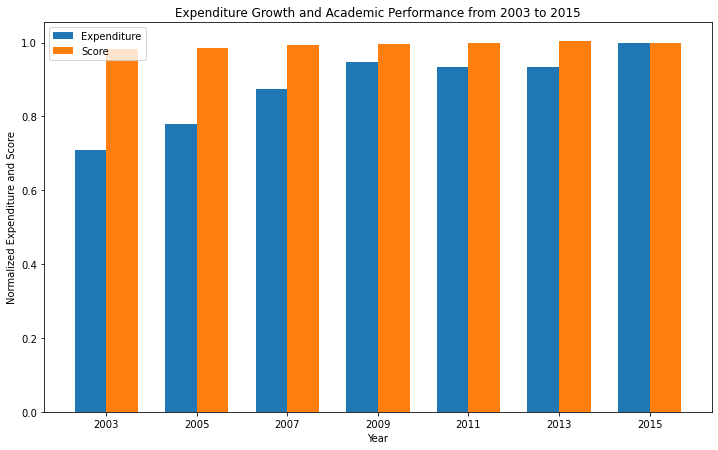

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.tight_layout()
index = np.arange(7)
e = ax.bar(index, year_exp_grades_summary['Sum_Expenditure']/650900851.0, 0.35, label="Expenditure")
g = ax.bar(index+0.35, year_exp_grades_summary['Sum_Score']/51456.0, 0.35, label="Score")
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Expenditure and Score')
ax.set_title('Expenditure Growth and Academic Performance from 2003 to 2015')
ax.set_xticks(index + 0.35 / 2)
ax.set_xticklabels(years)
ax.legend()
plt.show()
fig.savefig('exp_grades.png', bbox_inches='tight')

## Part 3

In [ ]:
df_raw = pd.read_csv('states_all.csv')

In [ ]:
num_features = ["TOTAL_REVENUE","FEDERAL_REVENUE","LOCAL_REVENUE","OTHER_EXPENDITURE","CAPITAL_OUTLAY_EXPENDITURE","GRADES_PK_G"]

In [ ]:
df_raw['TOTAL_SCORE'] = df_raw.loc[:,['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_MATH_8_SCORE']].sum(axis=1)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import os
from plotly import subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
import plotly.express as px
import datetime
import plotly.express as px
import plotly.graph_objects as go

import pandas as pd

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
codes = {}
for i in us_state_to_abbrev:
    codes[i.upper()] = us_state_to_abbrev[i]

### Plot Different Features on Map

In [ ]:
df = df_raw[df_raw.TOTAL_SCORE != 0].groupby('STATE')['TOTAL_SCORE'].mean().reset_index()
df['STATE'] = df['STATE'].map(codes)

fig = go.Figure(data=go.Choropleth(
    locations=df['STATE'], # Spatial coordinates
    z = df['TOTAL_SCORE'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Total Score",
))

fig.update_layout(
    title_text = 'Total Score by State',
    geo_scope='usa', # limite map scope to USA
    height= 550,
    width = 900
)

fig.show()

In [ ]:
df = df_raw.groupby('STATE')['TOTAL_REVENUE'].mean().reset_index()
df['STATE'] = df['STATE'].map(codes)

fig = go.Figure(data=go.Choropleth(
    locations=df['STATE'], # Spatial coordinates
    z = df['TOTAL_REVENUE'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Total Revenue",
))

fig.update_layout(
    title_text = 'Total Revenue by State',
    geo_scope='usa', # limite map scope to USA
    height= 550,
    width = 900
)

fig.show()

In [ ]:
df = df_raw.groupby('STATE')['FEDERAL_REVENUE'].mean().reset_index()
df['STATE'] = df['STATE'].map(codes)

fig = go.Figure(data=go.Choropleth(
    locations=df['STATE'], # Spatial coordinates
    z = df['FEDERAL_REVENUE'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Federal Revenue",
))

fig.update_layout(
    title_text = 'Federal Revenue by State',
    geo_scope='usa', # limite map scope to USA
    height= 550,
    width = 900
)

fig.show()

In [ ]:
df = df_raw.groupby('STATE')['LOCAL_REVENUE'].mean().reset_index()
df['STATE'] = df['STATE'].map(codes)

fig = go.Figure(data=go.Choropleth(
    locations=df['STATE'], # Spatial coordinates
    z = df['LOCAL_REVENUE'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Local Revenue",
))

fig.update_layout(
    title_text = 'Local Revenue by State',
    geo_scope='usa', # limite map scope to USA
    height= 550,
    width = 900
)

fig.show()

In [ ]:
df = df_raw.groupby('STATE')['OTHER_EXPENDITURE'].mean().reset_index()
df['STATE'] = df['STATE'].map(codes)

fig = go.Figure(data=go.Choropleth(
    locations=df['STATE'], # Spatial coordinates
    z = df['OTHER_EXPENDITURE'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Other Expenditure",
))

fig.update_layout(
    title_text = 'Other Expenditure by State',
    geo_scope='usa', # limite map scope to USA
    height= 550,
    width = 900
)

fig.show()

In [ ]:
df = df_raw.groupby('STATE')['CAPITAL_OUTLAY_EXPENDITURE'].mean().reset_index()
df['STATE'] = df['STATE'].map(codes)

fig = go.Figure(data=go.Choropleth(
    locations=df['STATE'], # Spatial coordinates
    z = df['CAPITAL_OUTLAY_EXPENDITURE'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Capital Outlay Expenditure",
))

fig.update_layout(
    title_text = 'Capital Outlay Expenditure by State',
    geo_scope='usa', # limite map scope to USA
    height= 550,
    width = 900
)

fig.show()

In [ ]:
df = df_raw.groupby('STATE')['GRADES_PK_G'].mean().reset_index()
df['STATE'] = df['STATE'].map(codes)

fig = go.Figure(data=go.Choropleth(
    locations=df['STATE'], # Spatial coordinates
    z = df['GRADES_PK_G'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Pre-Kindergarten Students",
))

fig.update_layout(
    title_text = 'Pre-Kindergarten Students by State',
    geo_scope='usa', # limite map scope to USA
    height= 550,
    width = 900
)

fig.show()

In [ ]:
df = df_raw.groupby('STATE')['AVG_MATH_4_SCORE'].mean().reset_index()
df['STATE'] = df['STATE'].map(codes)

fig = go.Figure(data=go.Choropleth(
    locations=df['STATE'], # Spatial coordinates
    z = df['AVG_MATH_4_SCORE'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "AVG_MATH_4_SCORE",
))

fig.update_layout(
    title_text = 'AVG_MATH_4_SCORE by State',
    geo_scope='usa', # limite map scope to USA
    height= 550,
    width = 900
)

fig.show()

In [ ]:
df = df_raw.groupby('STATE')['AVG_MATH_8_SCORE'].mean().reset_index()
df['STATE'] = df['STATE'].map(codes)

fig = go.Figure(data=go.Choropleth(
    locations=df['STATE'], # Spatial coordinates
    z = df['AVG_MATH_8_SCORE'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "AVG_MATH_8_SCORE",
))

fig.update_layout(
    title_text = 'AVG_MATH_8_SCORE by State',
    geo_scope='usa', # limite map scope to USA
    height= 550,
    width = 900
)

fig.show()

In [ ]:
df = df_raw.groupby('STATE')['AVG_READING_8_SCORE'].mean().reset_index()
df['STATE'] = df['STATE'].map(codes)

fig = go.Figure(data=go.Choropleth(
    locations=df['STATE'], # Spatial coordinates
    z = df['AVG_READING_8_SCORE'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "AVG_READING_8_SCORE",
))

fig.update_layout(
    title_text = 'AVG_READING_8_SCORE by State',
    geo_scope='usa', # limite map scope to USA
    height= 550,
    width = 900
)

fig.show()

In [ ]:
df = df_raw.groupby('STATE')['AVG_READING_4_SCORE'].mean().reset_index()
df['STATE'] = df['STATE'].map(codes)

fig = go.Figure(data=go.Choropleth(
    locations=df['STATE'], # Spatial coordinates
    z = df['AVG_READING_4_SCORE'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "AVG_READING_4_SCORE",
))

fig.update_layout(
    title_text = 'AVG_READING_4_SCORE by State',
    geo_scope='usa', # limite map scope to USA
    height= 550,
    width = 900
)

fig.show()

In [ ]:
df = df_raw.groupby('STATE')['GRADES_ALL_G'].mean().reset_index()
df['STATE'] = df['STATE'].map(codes)

fig = go.Figure(data=go.Choropleth(
    locations=df['STATE'], # Spatial coordinates
    z = df['GRADES_ALL_G'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Count of All Students",
))

fig.update_layout(
    title_text = 'Count of All Students by State',
    geo_scope='usa', # limite map scope to USA
    height= 550,
    width = 900
)

fig.show()

States with high total revenue are states with large number of students, but not necessarily states with high total score

States with highest total score across the years are 
Alaska, Illinois, and Vermont.

States with high total revenue across the years such as California, Texas and Florida are not the states with the highest total score. This may due to the fact that these states also rank among the top of the states that have a large number of total students.

### Compare Selected Features between Year 2003 and 2015 Among States

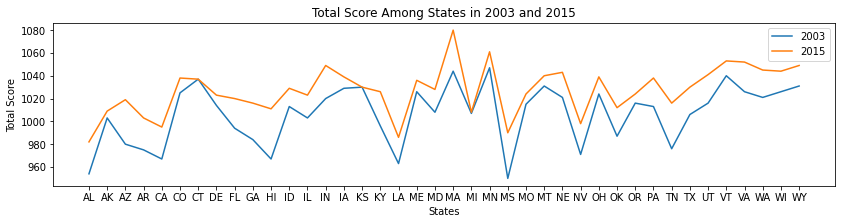

In [ ]:
df1 = df_raw[df_raw.YEAR == 2003].groupby('STATE')['TOTAL_SCORE'].mean().reset_index()
df1['STATE'] = df1['STATE'].map(codes)
df1.rename(columns={'TOTAL_SCORE':'TOTAL_SCORE_1'}, inplace=True)
df2 = df_raw[df_raw.YEAR == 2015].groupby('STATE')['TOTAL_SCORE'].mean().reset_index()
df2['STATE'] = df2['STATE'].map(codes)
df2.rename(columns={'TOTAL_SCORE':'TOTAL_SCORE_2'}, inplace=True)
df1 = df1.dropna()
df2 = df2.dropna()
plt.plot(df1.STATE.astype(str),df1.TOTAL_SCORE_1.astype(int),label='2003')
plt.plot(df2.STATE.astype(str),df2.TOTAL_SCORE_2.astype(int),label='2015')
#plt.xticks(rotation=90)
plt.legend()
plt.xlabel("States")
plt.ylabel("Total Score")
plt.title("Total Score Among States in 2003 and 2015")
plt.rcParams["figure.figsize"] = (14,3)
plt.show()

In [ ]:
df = pd.merge(df1,df2, how = "left")
df['DIFF'] = df['TOTAL_SCORE_2'] - df['TOTAL_SCORE_1']
df.sort_values('DIFF')

,STATE,TOTAL_SCORE_1,TOTAL_SCORE_2,DIFF
6,CT,1037.0,1037.0,0.0
15,KS,1030.0,1030.0,0.0
21,MI,1007.0,1008.0,1.0
1,AK,1003.0,1009.0,6.0
30,OR,1016.0,1024.0,8.0
25,MT,1031.0,1040.0,9.0
24,MO,1015.0,1024.0,9.0
7,DE,1014.0,1023.0,9.0
14,IA,1029.0,1039.0,10.0
18,ME,1026.0,1036.0,10.0


For the count of total score, we can see that overall, the 
scores for different states increased from 2003 to 2015. 
However, there are vibrations. For example, some of the 
states had a large increase. The top being Hawaii, with a 
total score increase of 44 points. It was followed by 
Mississippi and Tennessee, each of which increased by 40 
points. Some of the states did not change much, especially 
Connecticut and Kansas, where total score remained the 
same. Relative ranking between states changed as an 
result.

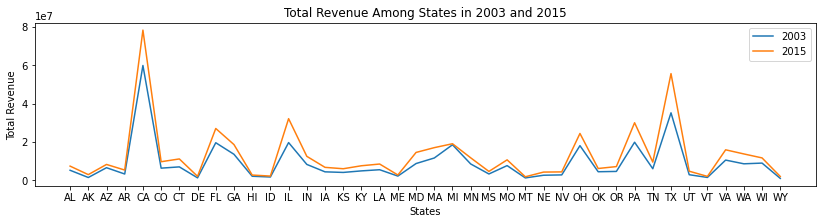

In [ ]:
df1 = df_raw[df_raw.YEAR == 2003].groupby('STATE')['TOTAL_REVENUE'].mean().reset_index()
df1['STATE'] = df1['STATE'].map(codes)
df2 = df_raw[df_raw.YEAR == 2015].groupby('STATE')['TOTAL_REVENUE'].mean().reset_index()
df2['STATE'] = df2['STATE'].map(codes)
df1 = df1.dropna()
df2 = df2.dropna()
plt.plot(df1.STATE.astype(str),df1.TOTAL_REVENUE.astype(int),label='2003')
plt.plot(df2.STATE.astype(str),df2.TOTAL_REVENUE.astype(int),label='2015')
#plt.xticks(rotation=90)
plt.legend()
plt.xlabel("States")
plt.ylabel("Total Revenue")
plt.title("Total Revenue Among States in 2003 and 2015")
plt.rcParams["figure.figsize"] = (14,3)
plt.show()

For the amount of total revenue, we can see that almost all 
the states had a higher total revenue in 2015 as compared 
to 2003, but the overall trend remained the same.

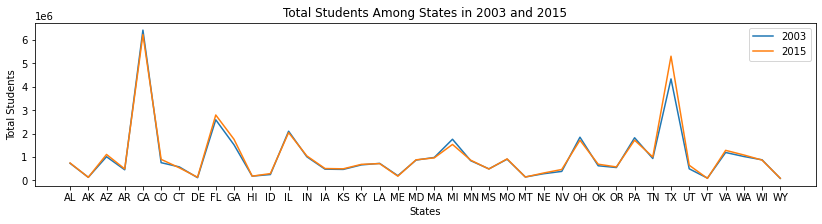

In [ ]:
df1 = df_raw[df_raw.YEAR == 2003].groupby('STATE')['GRADES_ALL_G'].mean().reset_index()
df1['STATE'] = df1['STATE'].map(codes)
df2 = df_raw[df_raw.YEAR == 2015].groupby('STATE')['GRADES_ALL_G'].mean().reset_index()
df2['STATE'] = df2['STATE'].map(codes)
df1 = df1.dropna()
df2 = df2.dropna()
plt.plot(df1.STATE.astype(str),df1.GRADES_ALL_G.astype(int),label='2003')
plt.plot(df2.STATE.astype(str),df2.GRADES_ALL_G.astype(int),label='2015')
#plt.xticks(rotation=90)
plt.legend()
plt.xlabel("States")
plt.ylabel("Total Students")
plt.title("Total Students Among States in 2003 and 2015")
plt.rcParams["figure.figsize"] = (14,3)
plt.show()

For the number of total students, we can see that the 
number barely changed among the states in 2003 
compared to 2015, as the two lines almost align with each 
other. Some minor differences occurred such as Michigan 
had slightly less students and Texas had slightly more 
students in 2015.

Total revenue and number of students remain relatively the same between 2003 and 2015 among the states, but changes occur for total score

## Part 4

In [ ]:
df_raw = pd.read_csv("states_all.csv")

In [ ]:
num_features = ["TOTAL_REVENUE","FEDERAL_REVENUE","LOCAL_REVENUE","OTHER_EXPENDITURE","CAPITAL_OUTLAY_EXPENDITURE","GRADES_PK_G"]

In [ ]:
df_raw['TOTAL_SCORE'] = df_raw.loc[:,['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_MATH_8_SCORE']].sum(axis=1)

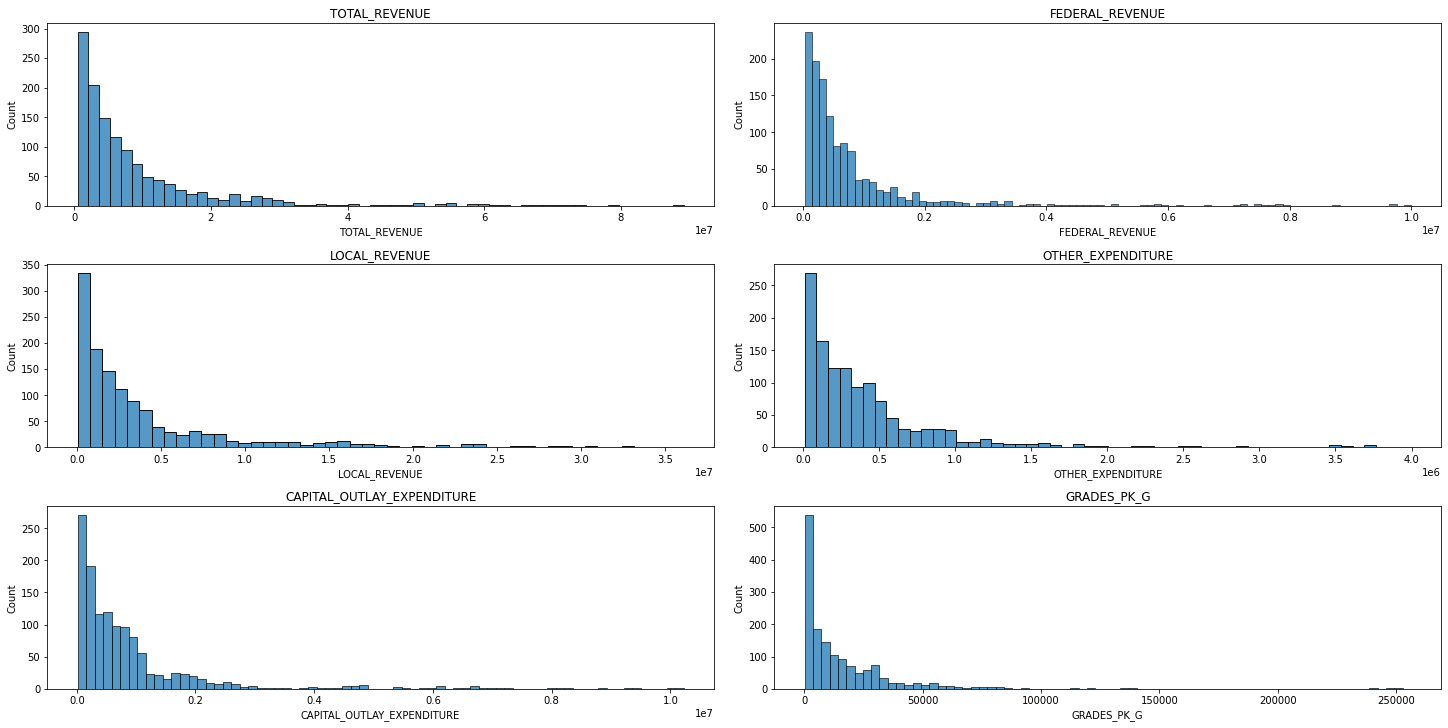

In [ ]:
fig,ax=plt.subplots(3,2,figsize=(20,10),constrained_layout = True)
i=0
while i < len(num_features):
    for j in range(0,3):
        for k in range(0,2):
            f=num_features[i]
            sns.histplot(data=df_raw[f],ax=ax[j][k])
            ax[j][k].set_title(num_features[i])
            i+=1

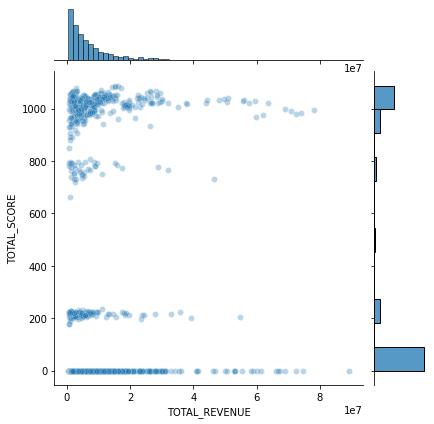

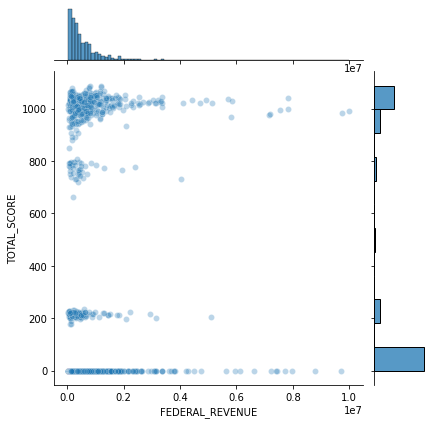

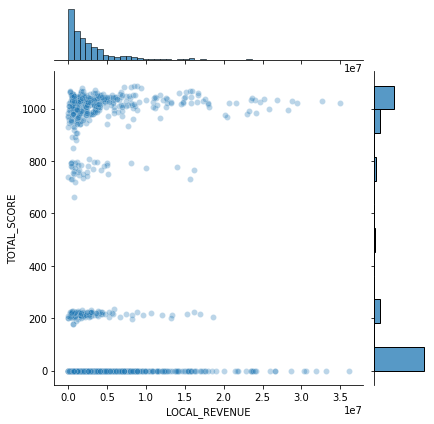

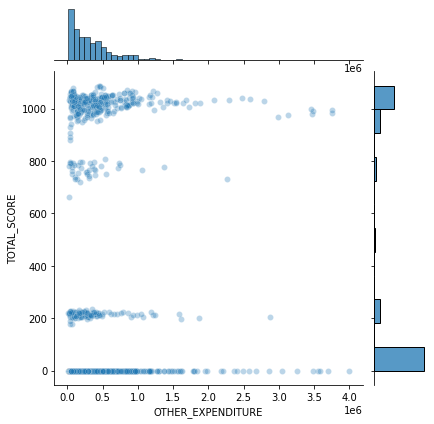

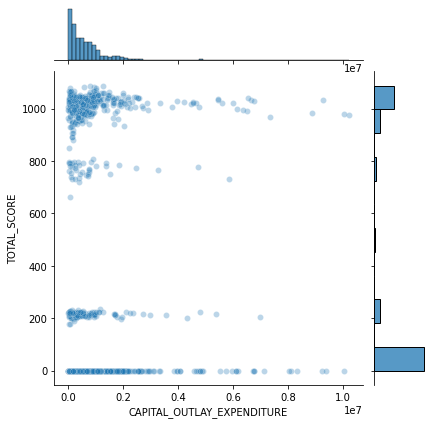

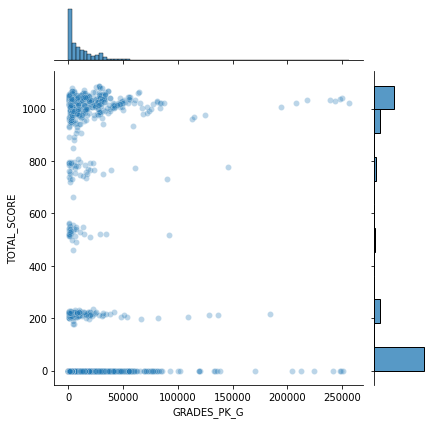

In [ ]:
i=0
while i < len(num_features):
  f=num_features[i]
  sns.jointplot(data=df_raw,x=f,y="TOTAL_SCORE",alpha=0.3)
  i+=1

In [ ]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,1715.0,2.002075e+03,9.568621e+00,1986.0,1994.00,2002.0,2010.00,2019.0
ENROLL,1224.0,9.175416e+05,1.066514e+06,43866.0,264514.50,649933.5,1010532.00,6307022.0
TOTAL_REVENUE,1275.0,9.102045e+06,1.175962e+07,465650.0,2189503.50,5085826.0,10845163.00,89217262.0
FEDERAL_REVENUE,1275.0,7.677799e+05,1.146992e+06,31020.0,189957.50,403548.0,827932.00,9990221.0
STATE_REVENUE,1275.0,4.223743e+06,5.549735e+06,0.0,1165776.00,2537754.0,5055547.50,50904567.0
LOCAL_REVENUE,1275.0,4.110522e+06,5.489562e+06,22093.0,715121.00,2058996.0,4755293.00,36105265.0
TOTAL_EXPENDITURE,1275.0,9.206242e+06,1.199279e+07,481665.0,2170404.00,5242672.0,10744201.50,85320133.0
INSTRUCTION_EXPENDITURE,1275.0,4.768010e+06,6.300569e+06,265549.0,1171336.50,2658253.0,5561959.00,43964520.0
SUPPORT_SERVICES_EXPENDITURE,1275.0,2.682587e+06,3.357214e+06,139963.0,638076.00,1525471.0,3222924.50,26058021.0
OTHER_EXPENDITURE,1224.0,4.299509e+05,5.347893e+05,11541.0,103449.25,271704.0,517222.25,3995951.0


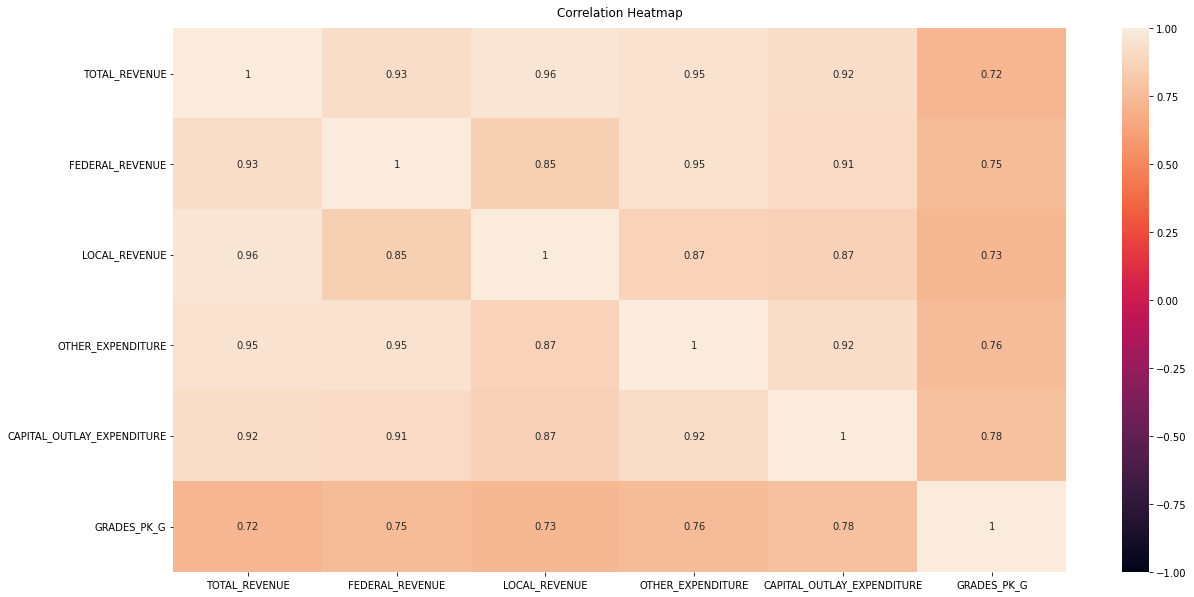

In [ ]:
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df_raw[num_features].corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Part 5

In [ ]:
# importing an external csv file containing the state to region mapping
df_region = pd.read_csv('drive/MyDrive/Colab Notebooks/AML/Project/archive/state_region_mapping.csv')
df = pd.read_csv('states_all.csv')
df_region.head()

,Abbreviation,STATE,REGION
0,AL,Alabama,Southeast
1,AK,Alaska,West
2,AZ,Arizona,Southwest
3,AR,Arkansas,Southeast
4,CA,California,West


In [ ]:
def underscore(row):
  return row.replace(" ", "_").upper()

In [ ]:
df_region['state'] = df_region.apply(lambda row : underscore(row['STATE']), axis = 1)

In [ ]:
df_region.head()

,Abbreviation,STATE,REGION,state
0,AL,Alabama,Southeast,ALABAMA
1,AK,Alaska,West,ALASKA
2,AZ,Arizona,Southwest,ARIZONA
3,AR,Arkansas,Southeast,ARKANSAS
4,CA,California,West,CALIFORNIA


In [ ]:
df_merged = pd.merge(df_bar1, df_region, left_on=['STATE'], right_on=['state'], how='left')
df_merged.head()

,STATE_x,average_revenue,Abbreviation,STATE_y,REGION,state
0,NEW_YORK,24.512143,NY,New York,Northeast,NEW_YORK
1,VERMONT,23.887965,VT,Vermont,Northeast,VERMONT
2,WYOMING,21.712531,WY,Wyoming,West,WYOMING
3,CONNECTICUT,21.340476,CT,Connecticut,Northeast,CONNECTICUT
4,NEW_JERSEY,21.279225,NJ,New Jersey,Northeast,NEW_JERSEY


In [ ]:
df_merged2 = pd.merge(df_bar2, df_region, left_on=['STATE'], right_on=['state'], how='left')
df_merged2.head()

,STATE_x,average_expenditure,Abbreviation,STATE_y,REGION,state
0,NEW_YORK,25.013784,NY,New York,Northeast,NEW_YORK
1,VERMONT,23.552449,VT,Vermont,Northeast,VERMONT
2,WYOMING,21.601667,WY,Wyoming,West,WYOMING
3,NEW_JERSEY,21.033065,NJ,New Jersey,Northeast,NEW_JERSEY
4,CONNECTICUT,20.231857,CT,Connecticut,Northeast,CONNECTICUT


In [ ]:
df_merged = df_merged[['state','REGION','average_revenue']]
df_merged2 = df_merged2[['state','REGION','average_expenditure']]

In [ ]:
df_merged.head()

,state,REGION,average_revenue
0,NEW_YORK,Northeast,24.512143
1,VERMONT,Northeast,23.887965
2,WYOMING,West,21.712531
3,CONNECTICUT,Northeast,21.340476
4,NEW_JERSEY,Northeast,21.279225


In [ ]:
import matplotlib.ticker as mtick
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)

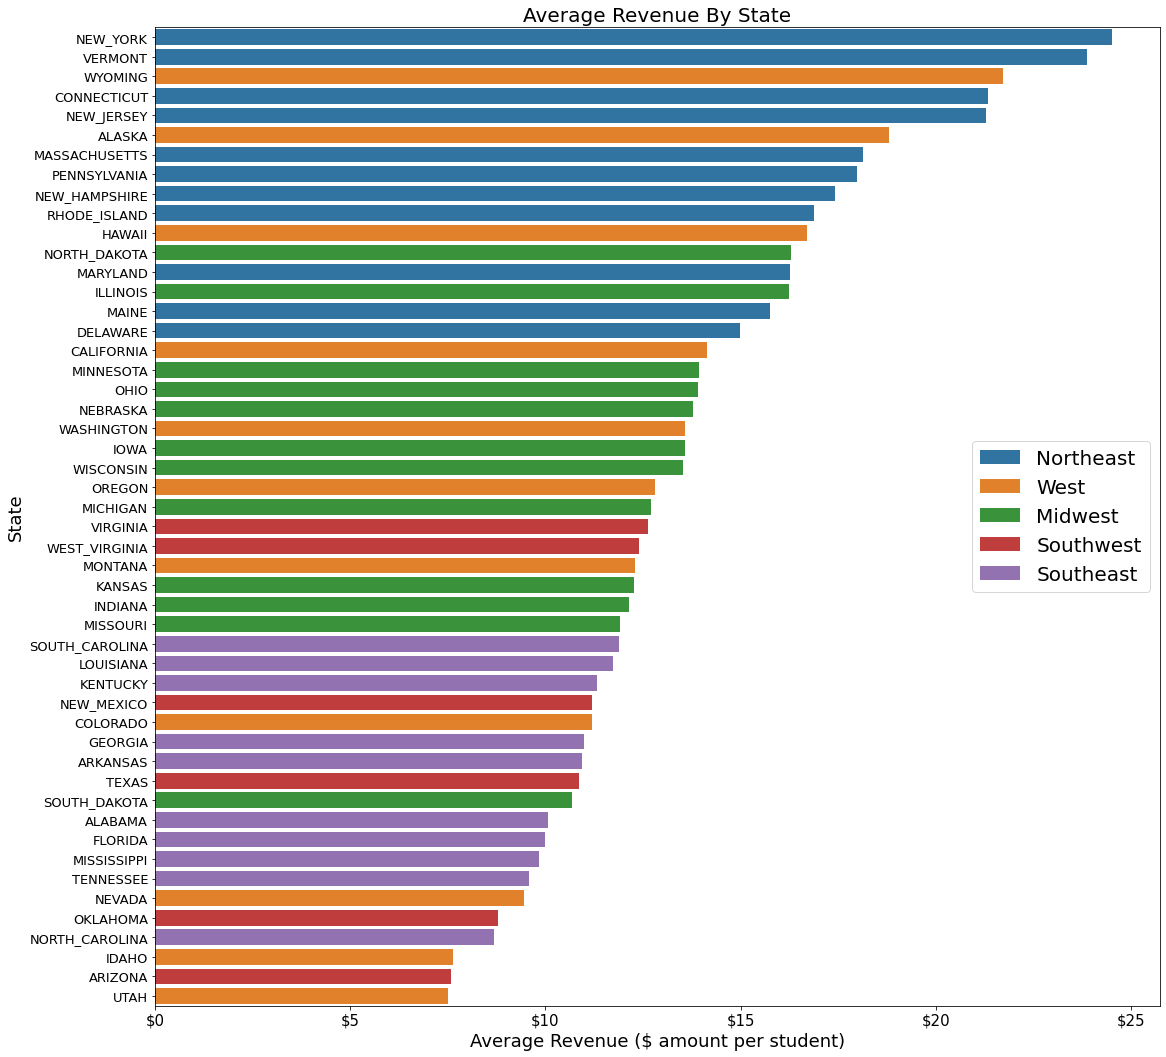

In [ ]:
# average revenue by state in 2016

fig, ax = plt.subplots(figsize=(18, 18))
sns.barplot(x="average_revenue", y="state", data=df_merged,hue='REGION',dodge=False)
plt.legend(loc='center right',prop = {'size' : 20})
plt.title('Average Revenue By State', fontdict={'fontsize': 20})
plt.xlabel('Average Revenue ($ amount per student)', fontsize=18)
ax.xaxis.set_major_formatter(tick) 
plt.ylabel('State', fontsize=18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.savefig('state_region.png');

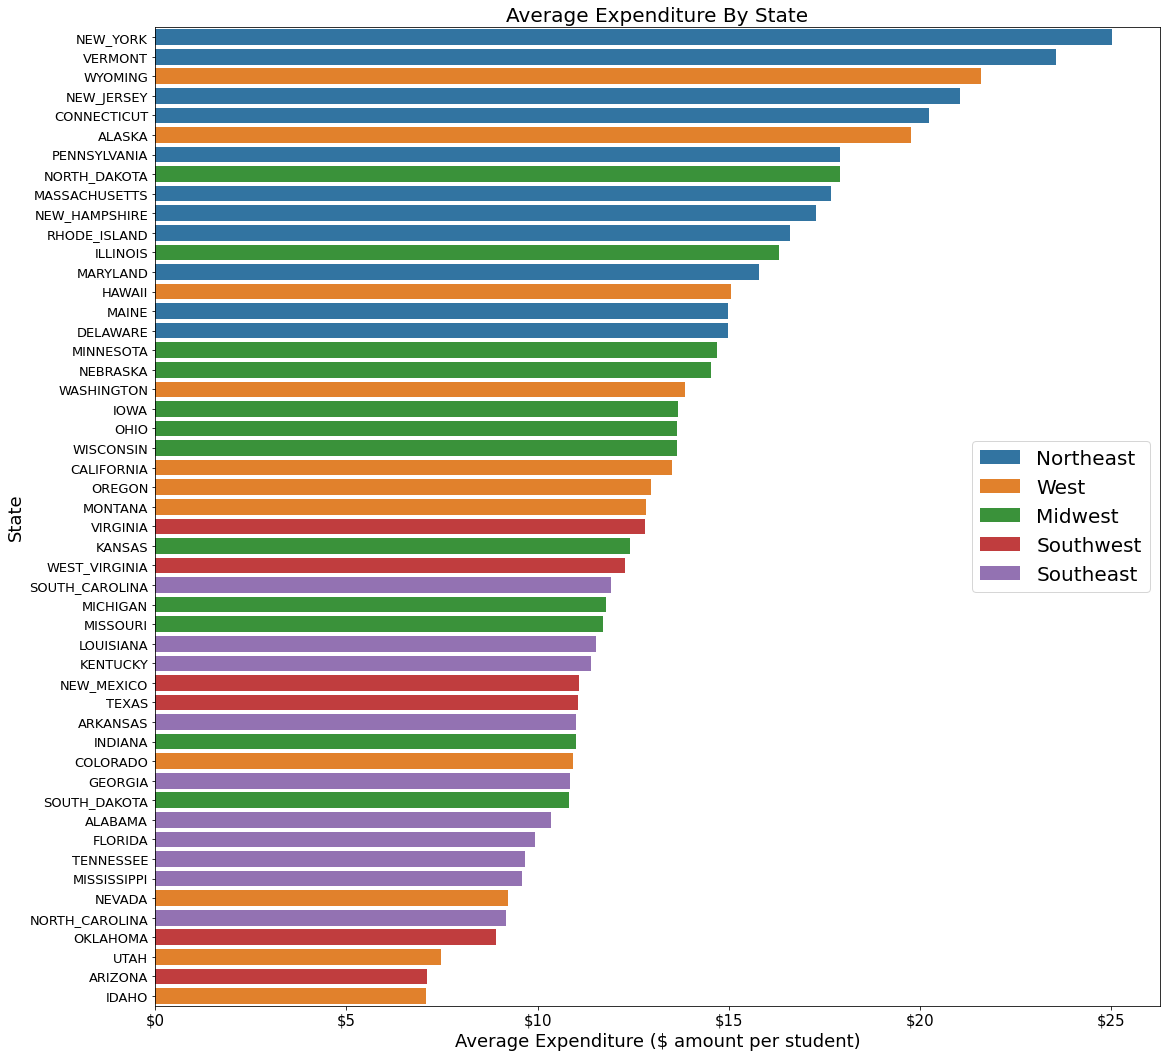

In [ ]:
# average expenditure by state in 2016

fig, ax = plt.subplots(figsize=(18, 18))
sns.barplot(x="average_expenditure", y="state", data=df_merged2,hue='REGION',dodge=False)
plt.legend(loc='center right',prop = {'size' : 20})
plt.title('Average Expenditure By State', fontdict={'fontsize': 20})
plt.xlabel('Average Expenditure ($ amount per student)', fontsize=18)
ax.xaxis.set_major_formatter(tick) 
plt.ylabel('State', fontsize=18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13);

**Scatter plots**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


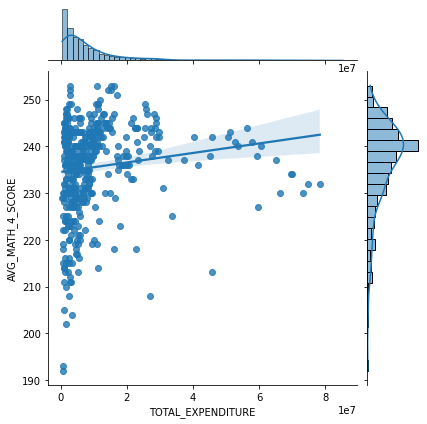

In [ ]:
# Total expenditure vs avg math 4 score

h = sns.jointplot("TOTAL_EXPENDITURE", "AVG_MATH_4_SCORE", data=df, kind="reg");
h.ax_joint.set_xlabel('TOTAL_EXPENDITURE');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


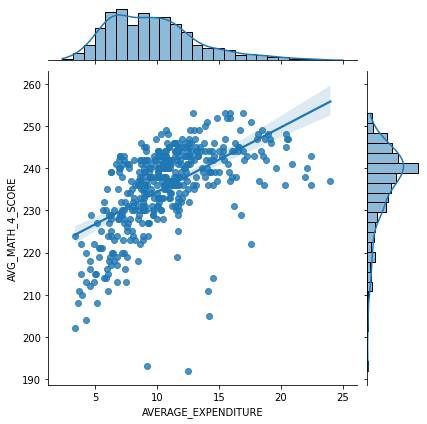

In [ ]:
# Average expenditure vs avg math 4 score

h = sns.jointplot("average_expenditure", "AVG_MATH_4_SCORE", data=df, kind="reg")
h.ax_joint.set_xlabel('AVERAGE_EXPENDITURE');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


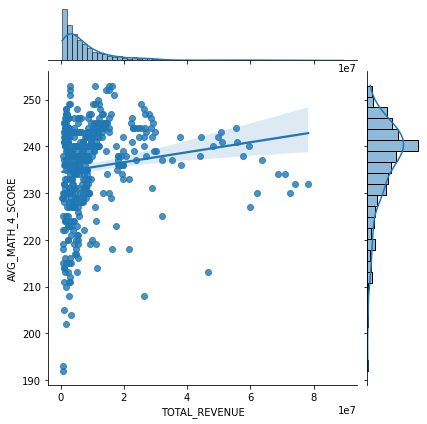

In [ ]:
# total revenue vs avg math 4 score

h = sns.jointplot("TOTAL_REVENUE", "AVG_MATH_4_SCORE", data=df, kind="reg");
h.ax_joint.set_xlabel('TOTAL_REVENUE');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


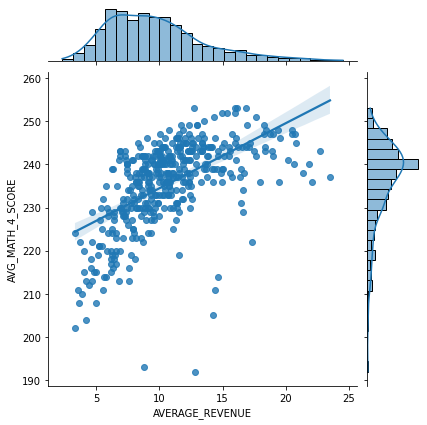

In [ ]:
# average revenue vs avg math 4 score

h = sns.jointplot("average_revenue", "AVG_MATH_4_SCORE", data=df, kind="reg")
h.ax_joint.set_xlabel('AVERAGE_REVENUE');

**Parallel coordinates plot**

In [ ]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/AML/Project/archive/states_all.csv')

del df['PRIMARY_KEY']

In [ ]:
df.set_index('STATE')
df.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [ ]:
scores = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']

In [ ]:
scores_df = df[scores].dropna().copy()
print (scores_df.isna().sum())

AVG_MATH_4_SCORE       0
AVG_MATH_8_SCORE       0
AVG_READING_4_SCORE    0
AVG_READING_8_SCORE    0
dtype: int64


In [ ]:
X = StandardScaler().fit_transform(scores_df)
X

array([[-2.57265392, -2.39499701, -1.97455211, -1.6707627 ],
       [-0.97373496, -0.27475017, -1.22678162, -1.20966306],
       [-1.61330254, -1.27251339, -1.67544392, -1.36336294],
       ...,
       [-1.29351875, -1.14779299, -1.07722753, -1.20966306],
       [ 0.46529211,  0.97245385, -0.03034884,  0.4810356 ],
       [ 1.10485969,  0.59829264,  1.01652984,  0.17363585]])

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
model = kmeans.fit(X)

In [ ]:
centers = model.cluster_centers_
centers

array([[ 1.21478537,  1.21098162,  1.1922559 ,  1.19574004],
       [-0.48795653, -0.53085543, -0.55321737, -0.55614526],
       [ 0.34152963,  0.36743997,  0.39458612,  0.40049096],
       [-1.76777438, -1.75871157, -1.77937134, -1.79841175]])

In [ ]:
def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')

    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]

    # Convert to pandas data frame for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [ ]:
from pandas.plotting import parallel_coordinates
from itertools import cycle, islice

In [ ]:
def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [ ]:
P = pd_centers(scores, centers)
P

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,prediction
0,1.214785,1.210982,1.192256,1.195740,0
1,-0.487957,-0.530855,-0.553217,-0.556145,1
2,0.341530,0.367440,0.394586,0.400491,2
3,-1.767774,-1.758712,-1.779371,-1.798412,3


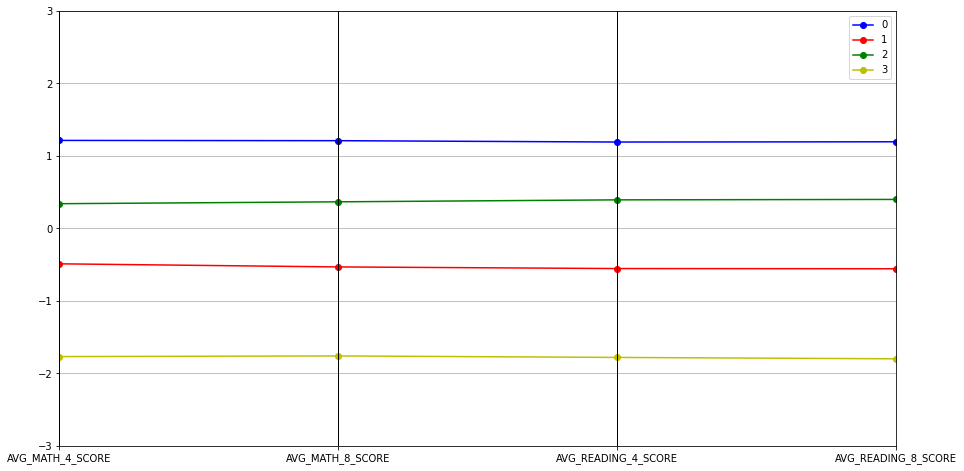

In [ ]:
parallel_plot(P)

Since the lines don't cross here, we can make a conclusion that the states that have low scores have similarly low scores across all the scoring criteria.

# Models

## Linear Regression

In [ ]:
df = pd.read_csv("us_education_final.csv")

In [ ]:
te_features = ['STATE']
num_features = ['YEAR','ENROLL','TOTAL_REVENUE', 'FEDERAL_REVENUE', \
                'LOCAL_REVENUE' ,'OTHER_EXPENDITURE', \
                'CAPITAL_OUTLAY_EXPENDITURE','GRADES_PK_G', \
                'EXPENDITURE_PER_ENROLLMENT']
target = df['TOTAL_SCORE']

In [ ]:
df = df[num_features+te_features]
df.head()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,LOCAL_REVENUE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,EXPENDITURE_PER_ENROLLMENT,STATE
0,1992,7.365843e+05,2678885.0,304177.0,715680.0,4.613081e+05,174053.0,8224.0,7.882837,7.882837
1,1992,1.304296e+05,1049591.0,106780.0,222100.0,5.982192e+04,37451.0,2371.0,14.170685,14.170685
2,1992,8.743221e+05,3258079.0,297888.0,1590376.0,3.344099e+05,609114.0,2544.0,7.499457,7.499457
3,1992,4.519019e+05,1711959.0,178571.0,574603.0,2.537191e+05,145212.0,808.0,8.225769,8.225769
4,1992,5.945343e+06,26260025.0,2072470.0,7641041.0,2.907487e+06,2044688.0,59067.0,9.492956,9.492956


In [ ]:
X_dev, X_test, y_dev, y_test = train_test_split(df, target, test_size=0.2, \
                                                random_state=42)

In [ ]:
preprocess = make_column_transformer((StandardScaler(),num_features),remainder='passthrough')
pipe = make_pipeline(preprocess, LinearRegression())
linear_model = pipe[-1]

In [ ]:
cv_results = cross_validate(linear_model, X_dev, y_dev, cv=10, return_estimator=True,scoring =['r2','neg_mean_squared_error'])

print(cv_results['test_r2'].mean())
print(-cv_results['test_neg_mean_squared_error'].mean())

0.121886668057271
668.0077190056429


In [ ]:
best_model = np.argmax(cv_results['test_r2'])
best_model

0

In [ ]:
coefs = cv_results['estimator'][best_model].coef_

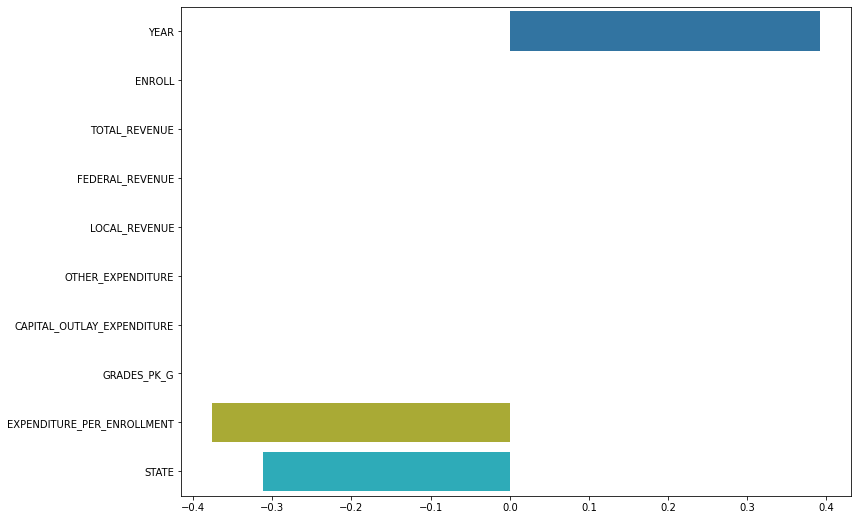

In [ ]:
fig = plt.figure(figsize=(12,9))
sns.barplot(y=df.columns, x=coefs, orient='h')

In [ ]:
y_pred = cv_results['estimator'][best_model].predict(X_test)

In [ ]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 560.24


In [ ]:
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.16


Observation:

Linear regression is highly unstable depending on the features we select. If we include the avg math and reading scores in our features, they can almost perfectly predict total scores and our MSE will go to 0 and R^2 to 1. The importance of all other features drop to 0. On the flip side, if we exclude them in our feature set, the model performance becomes poor. The dominant features in this case are year, state and expenditure per enrollment.

The MSE and R^2 are 560 and 0.16 on test set.

The MSE and R^2 are 668 and 0.12 on cross validation on average.

We think the reason why linear regression performs poorly is due to the fact that features in our dataset are somewhat correlated despite our effort to drop the most correlated ones, and we know multicolinearity can yield solutions that are wildly varying and possibly numerically unstable.

### Additional Analysis

#### Including math 8 in the features to predict reading 8 instead of total score

In [ ]:
df = pd.read_csv('us_education_final.csv')

target = df['AVG_READING_8_SCORE']

te_features = ['STATE']
num_features = ['YEAR','ENROLL','TOTAL_REVENUE', 'FEDERAL_REVENUE', \
                'LOCAL_REVENUE' ,'OTHER_EXPENDITURE', \
                'CAPITAL_OUTLAY_EXPENDITURE','GRADES_PK_G', \
                'EXPENDITURE_PER_ENROLLMENT','AVG_MATH_8_SCORE']

df = df[num_features+te_features]

In [ ]:
X_dev, X_test, y_dev, y_test = train_test_split(df, target, test_size=0.2, \
                                                random_state=42)

In [ ]:
preprocess = make_column_transformer((StandardScaler(),num_features),remainder='passthrough')
pipe = make_pipeline(preprocess, LinearRegression())

cv_results = cross_validate(pipe[-1], X_dev, y_dev, cv=10, return_estimator=True,scoring =['r2','neg_mean_squared_error'])

In [ ]:
print(cv_results['test_r2'].mean())
print(-cv_results['test_neg_mean_squared_error'].mean())

0.7700377825914528
8.844236599317501


In [ ]:
best_model = np.argmax(cv_results['test_r2'])
best_model

4

In [ ]:
y_pred = cv_results['estimator'][best_model].predict(X_test)

In [ ]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 8.57
Coefficient of determination: 0.75


#### Including reading 4 in the features to predict math 4 instead of total score

In [ ]:
df = pd.read_csv('us_education_final.csv')

target = df['AVG_MATH_4_SCORE']

te_features = ['STATE']
num_features = ['YEAR','ENROLL','TOTAL_REVENUE', 'FEDERAL_REVENUE', \
                'LOCAL_REVENUE' ,'OTHER_EXPENDITURE', \
                'CAPITAL_OUTLAY_EXPENDITURE','GRADES_PK_G', \
                'EXPENDITURE_PER_ENROLLMENT','AVG_READING_4_SCORE']

df = df[num_features+te_features]

In [ ]:
X_dev, X_test, y_dev, y_test = train_test_split(df, target, test_size=0.2, \
                                                random_state=42)

In [ ]:
preprocess = make_column_transformer((StandardScaler(),num_features),remainder='passthrough')
pipe = make_pipeline(preprocess, LinearRegression())

cv_results = cross_validate(pipe[-1], X_dev, y_dev, cv=10, return_estimator=True,scoring =['r2','neg_mean_squared_error'])

In [ ]:
print(cv_results['test_r2'].mean())
print(-cv_results['test_neg_mean_squared_error'].mean())

0.6700420163262852
17.039352665383067


In [ ]:
best_model = np.argmax(cv_results['test_r2'])
best_model

7

In [ ]:
y_pred = cv_results['estimator'][best_model].predict(X_test)

In [ ]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 18.29
Coefficient of determination: 0.62


Observation: 

Instead of predicting total score, we try to predict reading 8 score using math 8 score in the second analysis. Both MSE and R^2 on the test set have improved a lot to 9 and 0.75. In addition, we also tried to predict math 4 score using reading 4 score, and MSE and R^2 improved to 18 and 0.62 in this case.

## Ridge Regression

In [ ]:
df = pd.read_csv("us_education_final.csv")

In [ ]:
y = df['TOTAL_SCORE']

In [ ]:
te_feature = ['STATE']

In [ ]:
num_features = ['YEAR', 'ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'LOCAL_REVENUE', 'OTHER_EXPENDITURE', 
         'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'EXPENDITURE_PER_ENROLLMENT']

In [ ]:
X = df[num_features+te_feature]
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
preprocess = make_column_transformer((StandardScaler(), num_features),remainder='passthrough')
pipe = make_pipeline(preprocess, Ridge())
ridge_model = pipe[-1]

In [ ]:
cv_results = cross_validate(ridge_model, X_dev, y_dev, cv=10, return_estimator=True,
                            scoring =['r2','neg_mean_squared_error'])

print(cv_results['test_r2'].mean())
print(-cv_results['test_neg_mean_squared_error'].mean())

0.121887397950147
668.0072754466282


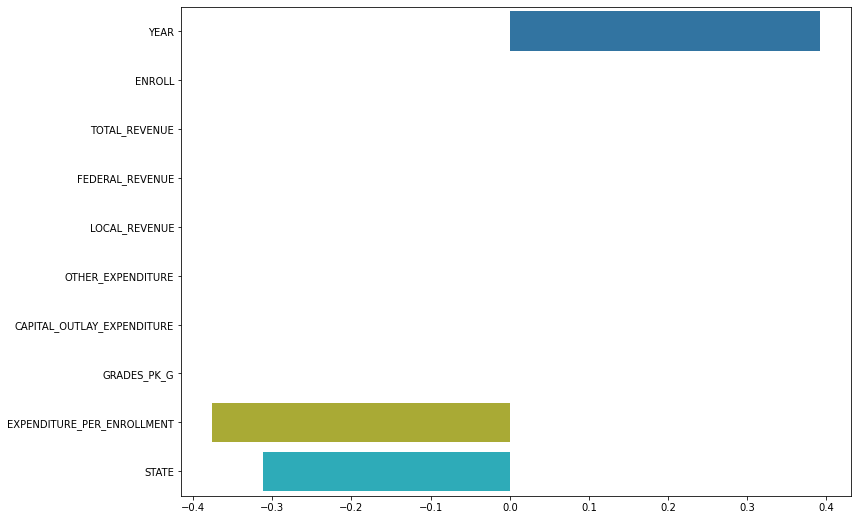

In [ ]:
# pick the model with the highest R^2
best_model = np.argmax(cv_results['test_r2'])
coefs = cv_results['estimator'][best_model].coef_
fig = plt.figure(figsize=(12,9))
sns.barplot(y=X.columns, x=coefs, orient='h')

In [ ]:
y_pred = cv_results['estimator'][best_model].predict(X_test)
print("Mean squared error: %.5f" % mean_squared_error(y_test, y_pred))
print("R-squared: %.5f" % r2_score(y_test, y_pred))

Mean squared error: 560.24338
R-squared: 0.15883


In [ ]:
# Tuning 
from numpy import arange
from sklearn.model_selection import GridSearchCV
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

search = GridSearchCV(ridge_model, grid, cv=10,scoring='r2', n_jobs=-1)
results = search.fit(X_dev, y_dev)
print("best score", results.best_score_)
print("best params", results.best_params_)

best score 0.12188739065345774
best params {'alpha': 0.99}


In [ ]:
y_pred_opt = search.predict(X_test)
print("MSE", mean_squared_error(y_test,y_pred_opt))

ridge_optimal_model = Ridge(alpha = 0.99)
ridge_optimal_model.fit(X_dev,y_dev)

MSE 561.1114942616956


Ridge(alpha=0.99)

10 features, reduction of 0.00%


<AxesSubplot:>

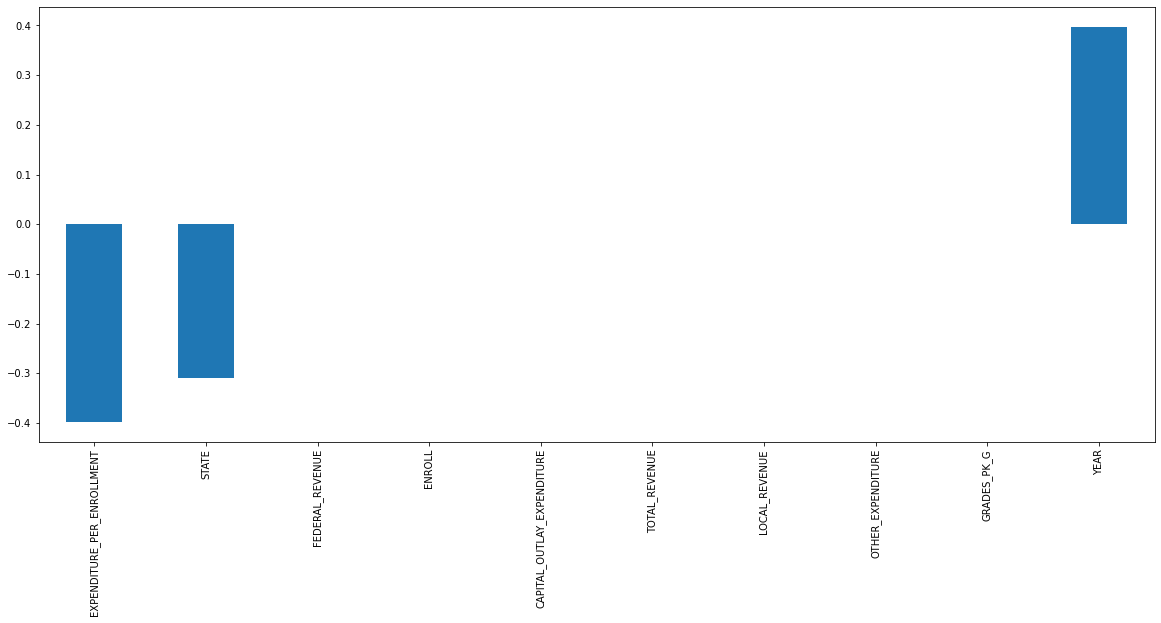

In [ ]:
feature_importance = pd.Series(index = X_dev.columns, data = ridge_optimal_model.coef_)

n_selected_features = (feature_importance!=0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (20,8))

Summary for ridge linear regression model

In our primary analysis where the target is the total score, which is the sum of 4th and 8th grade math and reading scores, Ridge linear regression model performs badly, as the best model after tuning on alpha gives MSE of 561. Feature importance figure shows that the most significant features are expenditure per enrollment, state, and year. However, this result doesn't make sense because this suggests that the more resources spent on students, the worse they perform. Overall, Ridge performs poorly, and we choose not to proceed with it.

### Additional analysis on math and reading scores predicability

#### Use 4th grade math score to predict 4th grade reading score

0.6867775711853109
15.501670445768577
Mean squared error: 14.47089
R-squared: 0.62580
best score 0.6867775567232781
best alpha 0.99


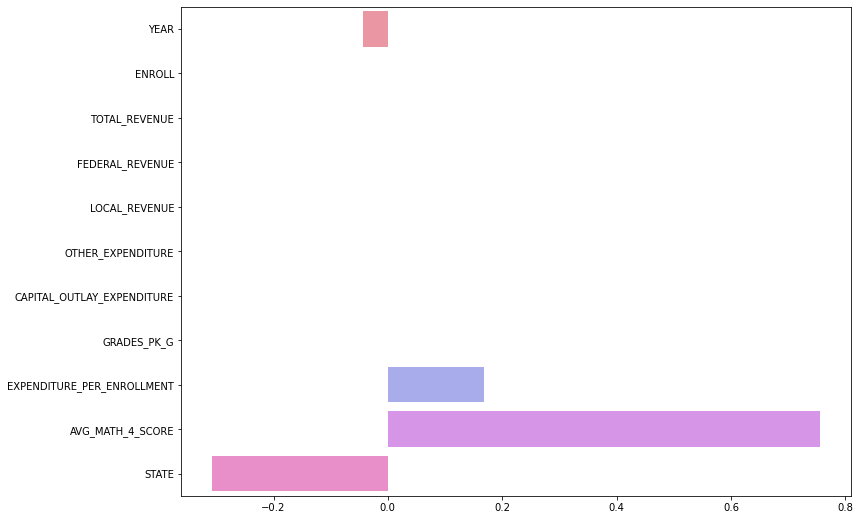

In [ ]:
y = df['AVG_READING_4_SCORE']
te_feature = ['STATE']
num_features = ['YEAR', 'ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'LOCAL_REVENUE', 'OTHER_EXPENDITURE', 
         'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'EXPENDITURE_PER_ENROLLMENT', 'AVG_MATH_4_SCORE']

X = df[num_features+te_feature]
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocess = make_column_transformer((StandardScaler(), num_features),remainder='passthrough')
pipe = make_pipeline(preprocess, Ridge())
ridge_model = pipe[-1]

cv_results = cross_validate(ridge_model, X_dev, y_dev, cv=10, return_estimator=True,
                            scoring =['r2','neg_mean_squared_error'])

print(cv_results['test_r2'].mean())
print(-cv_results['test_neg_mean_squared_error'].mean())

best_model = np.argmax(cv_results['test_r2'])
coefs = cv_results['estimator'][best_model].coef_
fig = plt.figure(figsize=(12,9))
sns.barplot(y=X.columns, x=coefs, orient='h')

y_pred = cv_results['estimator'][best_model].predict(X_test)
print("Mean squared error: %.5f" % mean_squared_error(y_test, y_pred))
print("R-squared: %.5f" % r2_score(y_test, y_pred))

# Tuning 
from numpy import arange
from sklearn.model_selection import GridSearchCV
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

search = GridSearchCV(ridge_model, grid, cv=10,scoring='r2', n_jobs=-1)
results = search.fit(X_dev, y_dev)
print("best score", results.best_score_)
print("best alpha", results.best_params_['alpha'])

MSE 14.482333406520244
11 features, reduction of 0.00%


<AxesSubplot:>

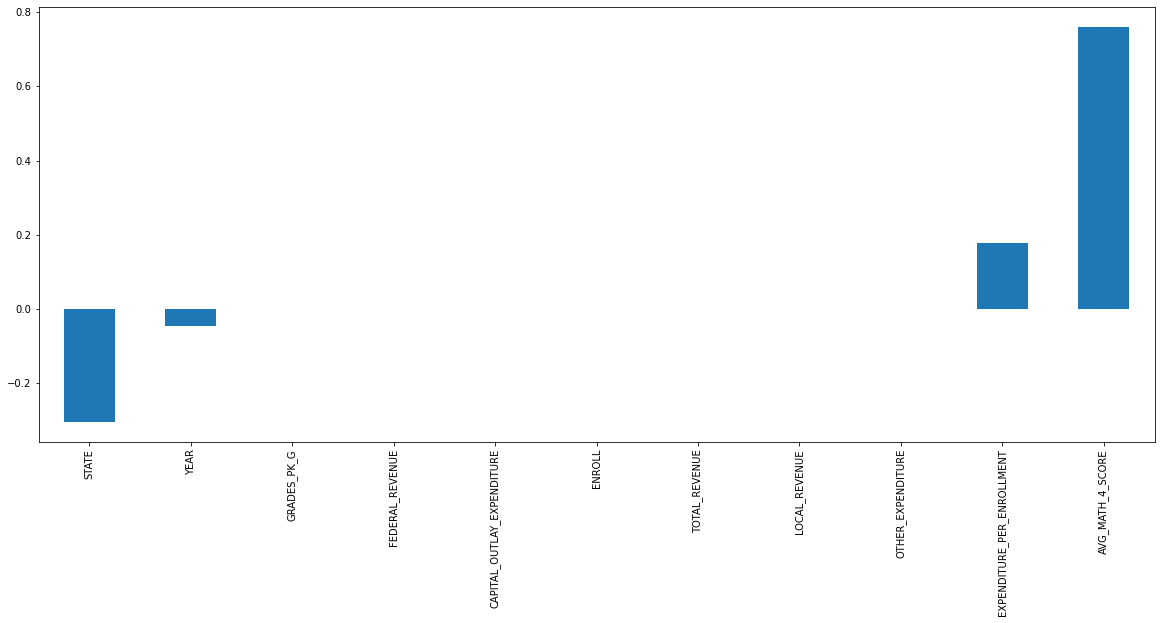

In [ ]:
y_pred_opt = search.predict(X_test)
print("MSE", mean_squared_error(y_test,y_pred_opt))

ridge_optimal_model = Ridge(alpha = results.best_params_['alpha'])
ridge_optimal_model.fit(X_dev,y_dev)

feature_importance = pd.Series(index = X_dev.columns, data = ridge_optimal_model.coef_)

n_selected_features = (feature_importance!=0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (20,8))

#### Use 8th grade math score to predict 8th grade reading score

0.7700382525361225
8.844221768294792
Mean squared error: 8.57013
R-squared: 0.74701
best score 0.770038247843291
best alpha 0.99


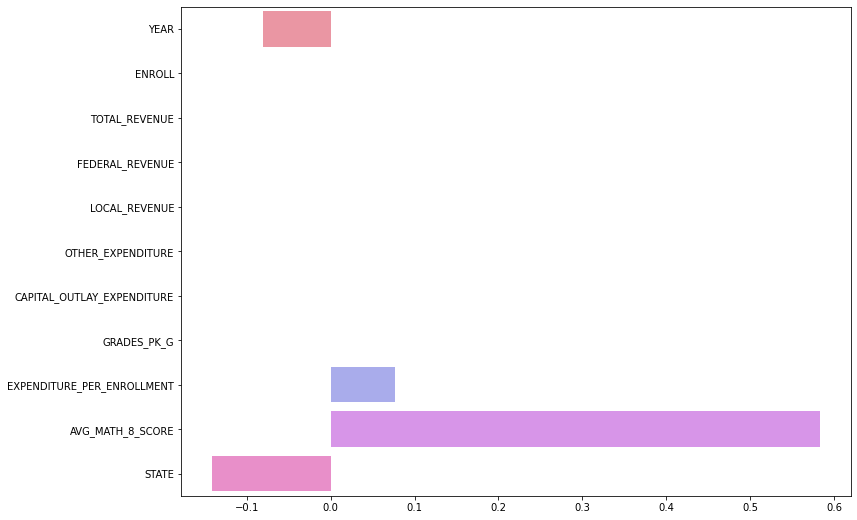

In [ ]:
y = df['AVG_READING_8_SCORE']
te_feature = ['STATE']
num_features = ['YEAR', 'ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'LOCAL_REVENUE', 'OTHER_EXPENDITURE', 
         'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'EXPENDITURE_PER_ENROLLMENT', 'AVG_MATH_8_SCORE']

X = df[num_features+te_feature]
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocess = make_column_transformer((StandardScaler(), num_features),remainder='passthrough')
pipe = make_pipeline(preprocess, Ridge())
ridge_model = pipe[-1]

cv_results = cross_validate(ridge_model, X_dev, y_dev, cv=10, return_estimator=True,
                            scoring =['r2','neg_mean_squared_error'])

print(cv_results['test_r2'].mean())
print(-cv_results['test_neg_mean_squared_error'].mean())

best_model = np.argmax(cv_results['test_r2'])
coefs = cv_results['estimator'][best_model].coef_
fig = plt.figure(figsize=(12,9))
sns.barplot(y=X.columns, x=coefs, orient='h')

y_pred = cv_results['estimator'][best_model].predict(X_test)
print("Mean squared error: %.5f" % mean_squared_error(y_test, y_pred))
print("R-squared: %.5f" % r2_score(y_test, y_pred))

# Tuning 
from numpy import arange
from sklearn.model_selection import GridSearchCV
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

search = GridSearchCV(ridge_model, grid, cv=10,scoring='r2', n_jobs=-1)
results = search.fit(X_dev, y_dev)
print("best score", results.best_score_)
print("best alpha", results.best_params_['alpha'])

MSE 8.601370534530279
11 features, reduction of 0.00%


<AxesSubplot:>

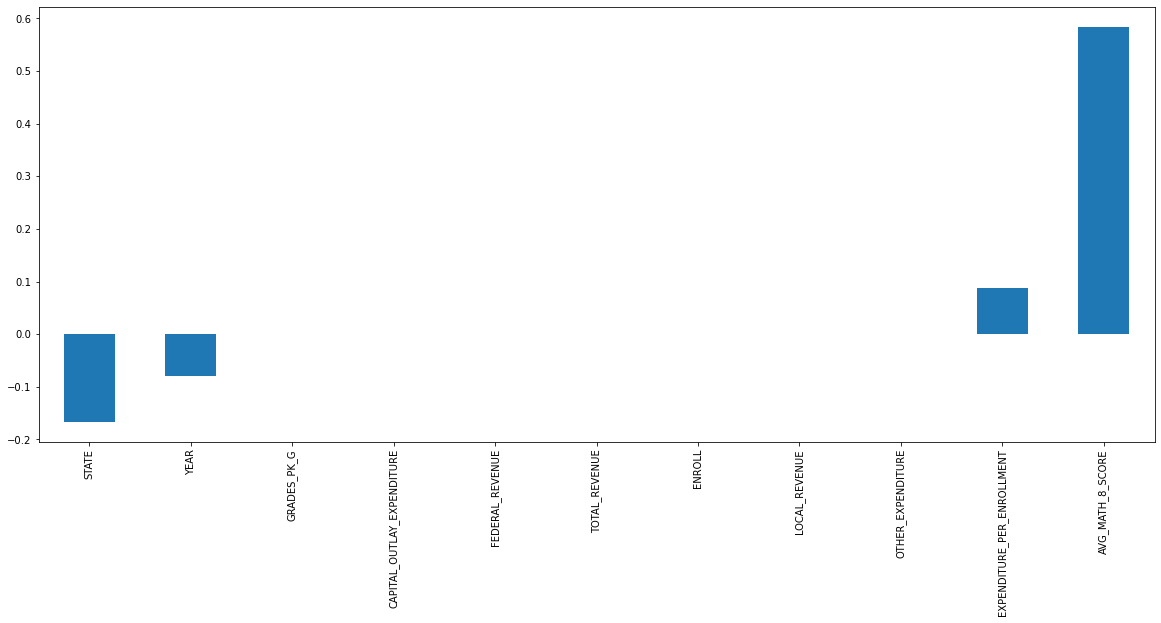

In [ ]:
y_pred_opt = search.predict(X_test)
print("MSE", mean_squared_error(y_test,y_pred_opt))

ridge_optimal_model = Ridge(alpha = results.best_params_['alpha'])
ridge_optimal_model.fit(X_dev,y_dev)

feature_importance = pd.Series(index = X_dev.columns, data = ridge_optimal_model.coef_)

n_selected_features = (feature_importance!=0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (20,8))

#### Using 4th grade math score to predict 8th grade math score

0.8031342420412846
15.62546690505429
Mean squared error: 19.14807
R-squared: 0.75161
best score 0.8031342390281196
best alpha 0.99


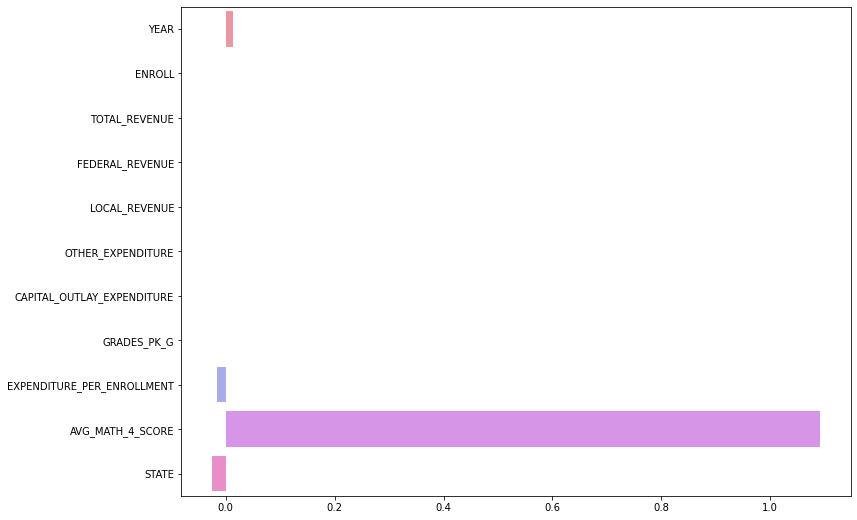

In [ ]:
y = df['AVG_MATH_8_SCORE']
te_feature = ['STATE']
num_features = ['YEAR', 'ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'LOCAL_REVENUE', 'OTHER_EXPENDITURE', 
         'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'EXPENDITURE_PER_ENROLLMENT', 'AVG_MATH_4_SCORE']

X = df[num_features+te_feature]
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocess = make_column_transformer((StandardScaler(), num_features),remainder='passthrough')
pipe = make_pipeline(preprocess, Ridge())
ridge_model = pipe[-1]

cv_results = cross_validate(ridge_model, X_dev, y_dev, cv=10, return_estimator=True,
                            scoring =['r2','neg_mean_squared_error'])

print(cv_results['test_r2'].mean())
print(-cv_results['test_neg_mean_squared_error'].mean())

best_model = np.argmax(cv_results['test_r2'])
coefs = cv_results['estimator'][best_model].coef_
fig = plt.figure(figsize=(12,9))
sns.barplot(y=X.columns, x=coefs, orient='h')

y_pred = cv_results['estimator'][best_model].predict(X_test)
print("Mean squared error: %.5f" % mean_squared_error(y_test, y_pred))
print("R-squared: %.5f" % r2_score(y_test, y_pred))

# Tuning 
from numpy import arange
from sklearn.model_selection import GridSearchCV
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

search = GridSearchCV(ridge_model, grid, cv=10,scoring='r2', n_jobs=-1)
results = search.fit(X_dev, y_dev)
print("best score", results.best_score_)
print("best alpha", results.best_params_['alpha'])

MSE 19.217720671740786
11 features, reduction of 0.00%


<AxesSubplot:>

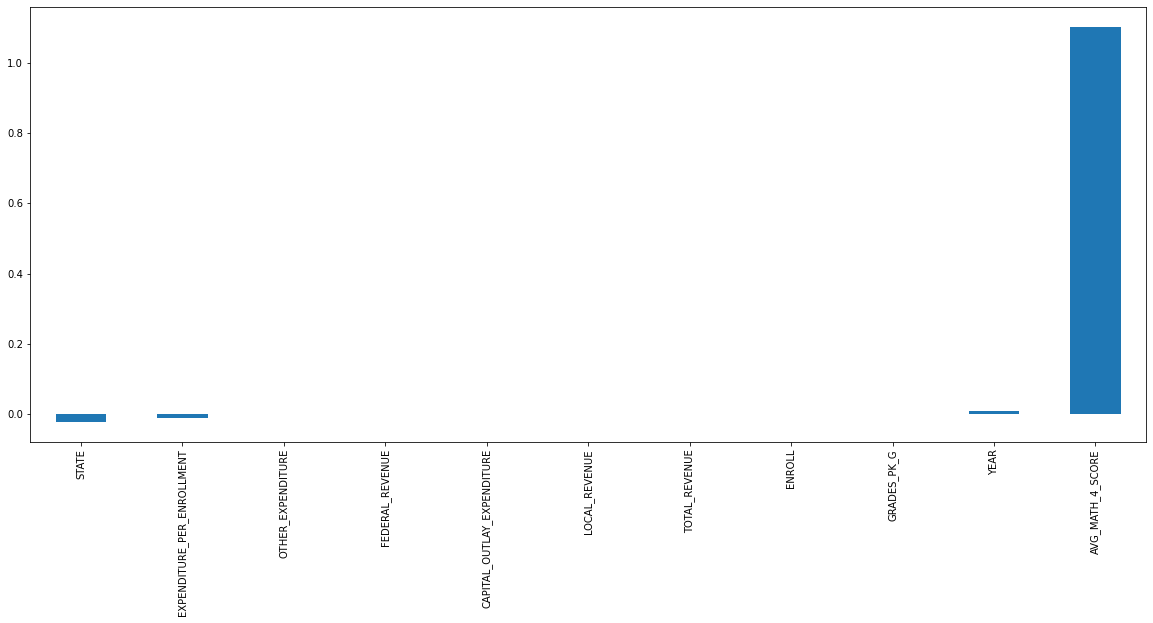

In [ ]:
y_pred_opt = search.predict(X_test)
print("MSE", mean_squared_error(y_test,y_pred_opt))

ridge_optimal_model = Ridge(alpha = results.best_params_['alpha'])
ridge_optimal_model.fit(X_dev,y_dev)

feature_importance = pd.Series(index = X_dev.columns, data = ridge_optimal_model.coef_)

n_selected_features = (feature_importance!=0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (20,8))

#### Using 4th grade reading score to predict 8th grade reading score

0.8655484640943012
5.16152253254367
Mean squared error: 5.24582
R-squared: 0.84514
best score 0.8655484611883837
best alpha 0.99


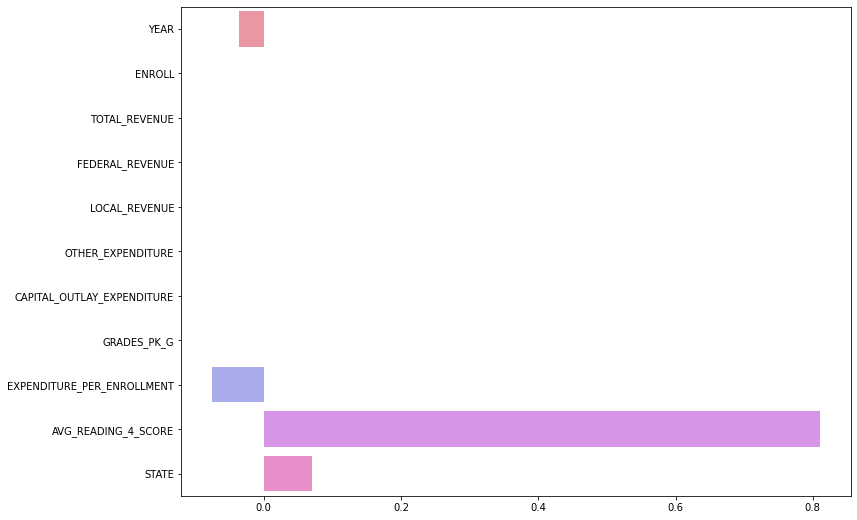

In [ ]:
y = df['AVG_READING_8_SCORE']
te_feature = ['STATE']
num_features = ['YEAR', 'ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'LOCAL_REVENUE', 'OTHER_EXPENDITURE', 
         'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'EXPENDITURE_PER_ENROLLMENT', 'AVG_READING_4_SCORE']

X = df[num_features+te_feature]
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocess = make_column_transformer((StandardScaler(), num_features),remainder='passthrough')
pipe = make_pipeline(preprocess, Ridge())
ridge_model = pipe[-1]

cv_results = cross_validate(ridge_model, X_dev, y_dev, cv=10, return_estimator=True,
                            scoring =['r2','neg_mean_squared_error'])

print(cv_results['test_r2'].mean())
print(-cv_results['test_neg_mean_squared_error'].mean())

best_model = np.argmax(cv_results['test_r2'])
coefs = cv_results['estimator'][best_model].coef_
fig = plt.figure(figsize=(12,9))
sns.barplot(y=X.columns, x=coefs, orient='h')

y_pred = cv_results['estimator'][best_model].predict(X_test)
print("Mean squared error: %.5f" % mean_squared_error(y_test, y_pred))
print("R-squared: %.5f" % r2_score(y_test, y_pred))

# Tuning 
from numpy import arange
from sklearn.model_selection import GridSearchCV
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

search = GridSearchCV(ridge_model, grid, cv=10,scoring='r2', n_jobs=-1)
results = search.fit(X_dev, y_dev)
print("best score", results.best_score_)
print("best alpha", results.best_params_['alpha'])

MSE 5.223976625905457
11 features, reduction of 0.00%


<AxesSubplot:>

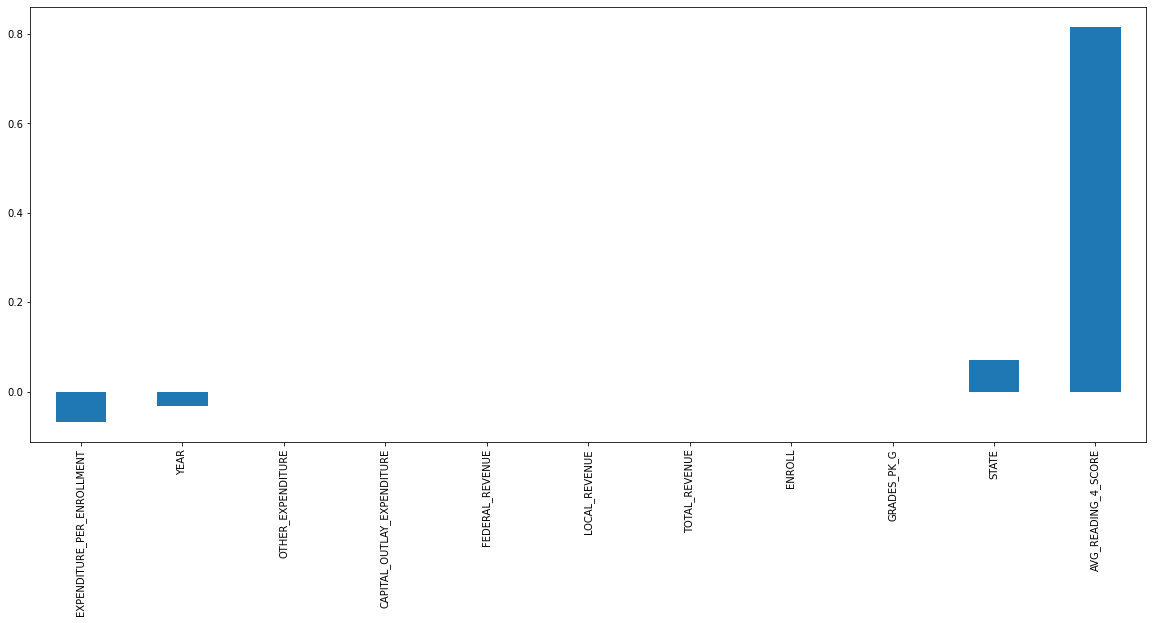

In [ ]:
y_pred_opt = search.predict(X_test)
print("MSE", mean_squared_error(y_test,y_pred_opt))

ridge_optimal_model = Ridge(alpha = results.best_params_['alpha'])
ridge_optimal_model.fit(X_dev,y_dev)

feature_importance = pd.Series(index = X_dev.columns, data = ridge_optimal_model.coef_)

n_selected_features = (feature_importance!=0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (20,8))

## Lasso Regression

In [ ]:
df = pd.read_csv("us_education_final.csv")

In [ ]:
X = df.drop(["TOTAL_SCORE", 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'], axis = 1)
y = df["TOTAL_SCORE"]

from sklearn.model_selection import train_test_split
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate

# Training using cross validation
lasso_model = make_pipeline(StandardScaler(with_mean=False), Lasso())
scores = cross_validate(lasso_model, X_dev, y_dev, cv=10, return_estimator=True,scoring =['r2','neg_mean_squared_error'])
print(" Mean R^2 score after cross-validation: ", scores['test_r2'].mean())
print("Mean MSE after cross-validation: ", -scores['test_neg_mean_squared_error'].mean())

best_model = np.argmax(scores['test_r2'])
y_pred = scores['estimator'][best_model].predict(X_test)

 Mean R^2 score after cross-validation:  0.10342205185534645
Mean MSE after cross-validation:  682.6259470712876


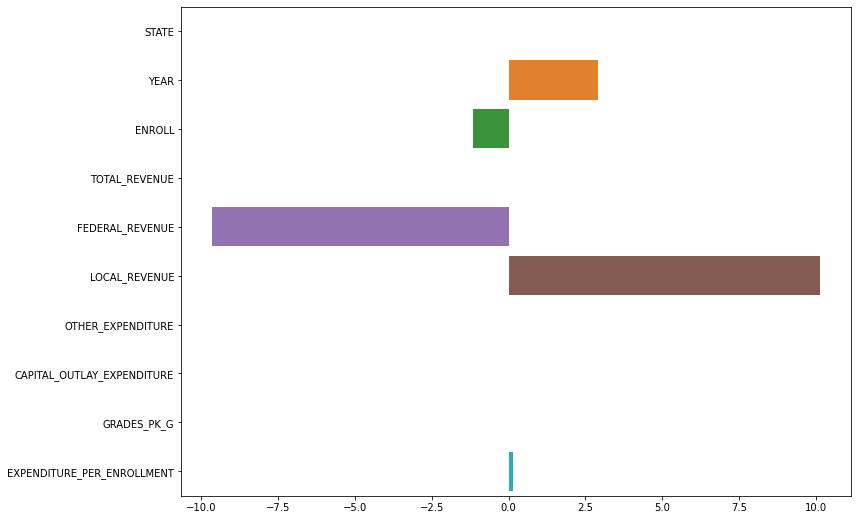

In [ ]:
coefs = scores['estimator'][best_model][-1].coef_
fig = plt.figure(figsize=(12,9))
sns.barplot(y=df[['STATE','YEAR','ENROLL','TOTAL_REVENUE', 'FEDERAL_REVENUE', \
                'LOCAL_REVENUE' ,'OTHER_EXPENDITURE', \
                'CAPITAL_OUTLAY_EXPENDITURE','GRADES_PK_G', \
                'EXPENDITURE_PER_ENROLLMENT']].columns, x=coefs, orient='h')

In [ ]:
# The mean squared error on test set using the best model
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination on test set using the best model
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 582.72
Coefficient of determination: 0.13


Observation:

Lasso model's performance is looked at deeply in order to check if feature selection could improve the performance for the specific task and dataset at hand. Results help us conclude that the performance received is poor (just like any other linear model in this situation).

Feature importance map says that federal revenue and total revenue are the primary contributors to the TOTAL_SCORE, but they have opposite signs. From an intuition perspective, both of them should be positively correlated to the TOTAL_SCORE and increase in either one of them should positively impact the performance of the children in exams (as they would be given more facilities). Hence, we should be skeptical in pursuing the lasso model.

The MSE and R^2 are 582.72 and 0.13 on test set.

The MSE and R^2 are 682.62 and 0.1 on cross validation on average.

### Additional Analysis: Training on AVG_MATH_8_SCORE to predict AVG_READING_8_SCORE

In [ ]:
X = df.drop(["TOTAL_SCORE",'AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE', "AVG_READING_8_SCORE"], axis = 1)
y = df["AVG_READING_8_SCORE"]

from sklearn.model_selection import train_test_split
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate

# Training using cross validation
lasso_model = make_pipeline(StandardScaler(with_mean=False), Lasso())
scores = cross_validate(lasso_model, X_dev, y_dev, cv=10, return_estimator=True,scoring =['r2','neg_mean_squared_error'])
print(" Mean R^2 score after cross-validation: ", scores['test_r2'].mean())
print("Mean MSE after cross-validation: ", -scores['test_neg_mean_squared_error'].mean())

best_model = np.argmax(scores['test_r2'])
y_pred = scores['estimator'][best_model].predict(X_test)

 Mean R^2 score after cross-validation:  0.6919377704829264
Mean MSE after cross-validation:  11.903793298466013


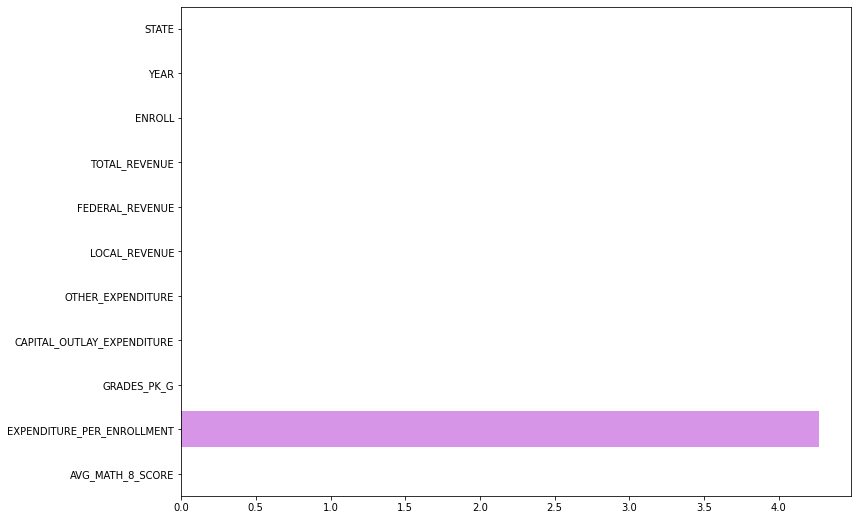

In [ ]:
coefs = scores['estimator'][best_model][-1].coef_
fig = plt.figure(figsize=(12,9))
sns.barplot(y=df[['STATE','YEAR','ENROLL','TOTAL_REVENUE', 'FEDERAL_REVENUE', \
                'LOCAL_REVENUE' ,'OTHER_EXPENDITURE', \
                'CAPITAL_OUTLAY_EXPENDITURE','GRADES_PK_G', \
                'EXPENDITURE_PER_ENROLLMENT', "AVG_MATH_8_SCORE"]].columns, x=coefs, orient='h')

In [ ]:
# The mean squared error on test set using the best model
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination on test set using the best model
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 10.64
Coefficient of determination: 0.69


Observation:

When it comes to predicting AVG_READING_8_SCORE from AVG_MATH_8_SCORE, the model performs better. This analysis was primarily done in order to check the feature importance map and see which features contribute to AVG_READING_8_SCORE. To our surprise, EXPENDITURE_PER_ENROLLMENT column contributes 100% to AVG_READING_8_SCORE and no other feature is selected by the lasso model.

The MSE and R^2 are 10.62 and 0.69 on test set.

The MSE and R^2 are 11.90 and 0.69 on cross validation on average.

### Additional Analysis: Training on AVG_MATH_4_SCORE to predict AVG_READING_4_SCORE

In [ ]:
X = df.drop(["TOTAL_SCORE",'AVG_MATH_8_SCORE', 'AVG_READING_8_SCORE', "AVG_READING_4_SCORE"], axis = 1)
y = df["AVG_READING_4_SCORE"]

from sklearn.model_selection import train_test_split
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate

# Training using cross validation
lasso_model = make_pipeline(StandardScaler(with_mean=False), Lasso())
scores = cross_validate(lasso_model, X_dev, y_dev, cv=10, return_estimator=True,scoring =['r2','neg_mean_squared_error'])
print(" Mean R^2 score after cross-validation: ", scores['test_r2'].mean())
print("Mean MSE after cross-validation: ", -scores['test_neg_mean_squared_error'].mean())

best_model = np.argmax(scores['test_r2'])
y_pred = scores['estimator'][best_model].predict(X_test)

 Mean R^2 score after cross-validation:  0.6309746541227288
Mean MSE after cross-validation:  18.360293093907494


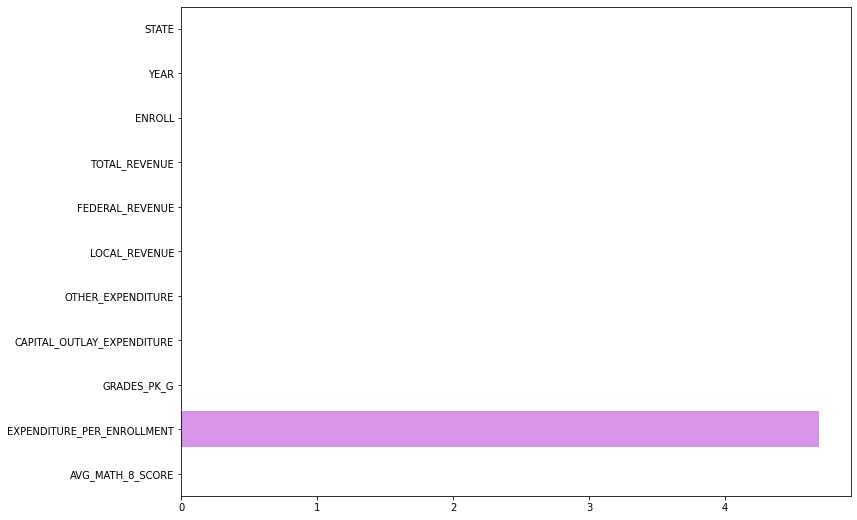

In [ ]:
coefs = scores['estimator'][best_model][-1].coef_
fig = plt.figure(figsize=(12,9))
sns.barplot(y=df[['STATE','YEAR','ENROLL','TOTAL_REVENUE', 'FEDERAL_REVENUE', \
                'LOCAL_REVENUE' ,'OTHER_EXPENDITURE', \
                'CAPITAL_OUTLAY_EXPENDITURE','GRADES_PK_G', \
                'EXPENDITURE_PER_ENROLLMENT', "AVG_MATH_8_SCORE"]].columns, x=coefs, orient='h')

In [ ]:
# The mean squared error on test set using the best model
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination on test set using the best model
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 15.92
Coefficient of determination: 0.59


Observation:

When it comes to predicting AVG_READING_4_SCORE from AVG_MATH_4_SCORE, the model still performs better compared to the original model that was trained without any of the average score values as features. This analysis was primarily done in order to check the feature importance map and see which features contribute to AVG_READING_4_SCORE. To our surprise, EXPENDITURE_PER_ENROLLMENT column contributes 100% to AVG_READING_4_SCORE and no other feature is selected by the lasso model (similar to the trend observed while predicting AVG_READING_8_SCORE from AVG_MATH_8_SCORE).

The MSE and R^2 are 18.36 and 0.63 on test set.

The MSE and R^2 are 15.92 and 0.59 on cross validation on average.

## Elastic Net Regression

In [ ]:
df = pd.read_csv("us_education_final.csv")

In [ ]:
te_features = ['STATE']
num_features = ['YEAR','ENROLL','TOTAL_REVENUE', 'FEDERAL_REVENUE', 
                'LOCAL_REVENUE' ,'OTHER_EXPENDITURE', 
                'CAPITAL_OUTLAY_EXPENDITURE','GRADES_PK_G', 
                'EXPENDITURE_PER_ENROLLMENT']
target = df['TOTAL_SCORE']

In [ ]:
df = df[num_features+te_features]
df

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,LOCAL_REVENUE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,EXPENDITURE_PER_ENROLLMENT,STATE
0,1992,7.365843e+05,2678885.00,304177.00,715680.00,4.613081e+05,174053.00,8224.000000,7.882837,7.882837
1,1992,1.304296e+05,1049591.00,106780.00,222100.00,5.982192e+04,37451.00,2371.000000,14.170685,14.170685
2,1992,8.743221e+05,3258079.00,297888.00,1590376.00,3.344099e+05,609114.00,2544.000000,7.499457,7.499457
3,1992,4.519019e+05,1711959.00,178571.00,574603.00,2.537191e+05,145212.00,808.000000,8.225769,8.225769
4,1992,5.945343e+06,26260025.00,2072470.00,7641041.00,2.907487e+06,2044688.00,59067.000000,9.492956,9.492956
...,...,...,...,...,...,...,...,...,...,...
1678,2019,1.179632e+06,11237280.32,759245.56,6059669.12,4.820910e+05,1017358.72,15682.468750,9.753728,9.753728
1679,2019,1.010687e+06,9295918.12,752469.48,2778711.96,4.154238e+05,1282112.24,8459.250000,9.461723,9.461723
1680,2019,2.891283e+05,2664419.00,287330.80,813074.48,1.760134e+05,185668.60,7927.031250,9.479360,9.479360
1681,2019,8.671074e+05,8944846.84,572206.44,3967936.20,3.625247e+05,675102.72,30740.593750,10.554923,10.554923


<AxesSubplot:xlabel='TOTAL_SCORE', ylabel='Count'>

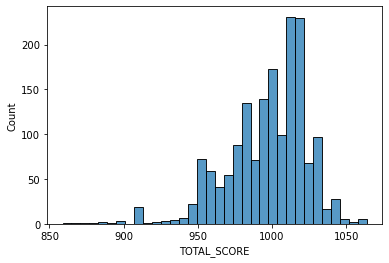

In [ ]:
sns.histplot(target)

In [ ]:
X_dev, X_test, y_dev, y_test = train_test_split(df, target, test_size=0.2,random_state=42)

In [ ]:
preprocess = make_column_transformer((StandardScaler(),num_features),remainder='passthrough')
pipe = make_pipeline(preprocess, ElasticNet())
elastic_net_model = pipe[-1]

In [ ]:
#Elastic Net 
cv_results = cross_validate(elastic_net_model, X_dev, y_dev, cv=10, return_estimator=True,scoring =['r2','neg_mean_squared_error'])

print(cv_results['test_r2'].mean())
print(-cv_results['test_neg_mean_squared_error'].mean())

0.12231965360414283
667.8376392740462


<AxesSubplot:>

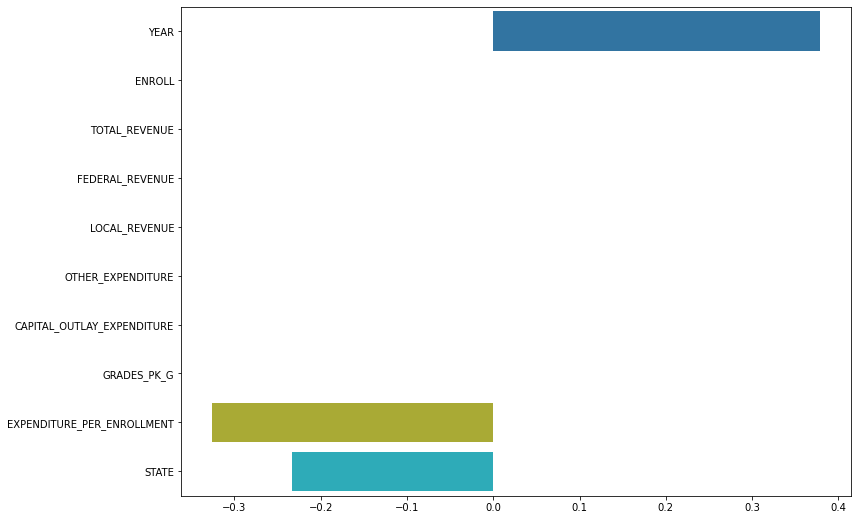

In [ ]:
best_model = np.argmax(cv_results['test_r2'])
coefs = cv_results['estimator'][best_model].coef_
fig = plt.figure(figsize=(12,9))
sns.barplot(y=df.columns, x=coefs, orient='h')

In [ ]:
y_pred = cv_results['estimator'][best_model].predict(X_test)
print("Mean squared error: %.5f" % mean_squared_error(y_test, y_pred))
print("R-squared: %.5f" % r2_score(y_test, y_pred))

Mean squared error: 559.84606
R-squared: 0.15943


In [ ]:
#Tuning 
from numpy import arange
from sklearn.model_selection import GridSearchCV
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)

In [ ]:
search = GridSearchCV(elastic_net_model, grid, cv=10,scoring='r2', n_jobs=-1)
results = search.fit(X_dev, y_dev)
print(results.best_score_)
print(results.best_params_)

0.12389475978435227
{'alpha': 10.0, 'l1_ratio': 0.0}


C:\Users\Ziyao Zhou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.428e+05, tolerance: 1.032e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [ ]:
y_pred_opt = search.predict(X_test)
print(mean_squared_error(y_test,y_pred_opt))

560.0476080817606


In [ ]:
elastic_net_optimal_model = ElasticNet(alpha = 10.0, l1_ratio = 0.0)
elastic_net_optimal_model.fit(X_dev,y_dev)

C:\Users\Ziyao Zhou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.428e+05, tolerance: 1.032e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=10.0, l1_ratio=0.0)

In [ ]:
elastic_net_optimal_model.coef_

array([ 3.34191217e-01, -9.14178442e-06,  8.59228250e-07, -1.49994481e-05,
        2.57163047e-06,  4.05753762e-06, -7.21031268e-07,  3.26655731e-05,
       -1.94335349e-01, -1.68057207e-01])

10 features, reduction of 0.00%


<AxesSubplot:>

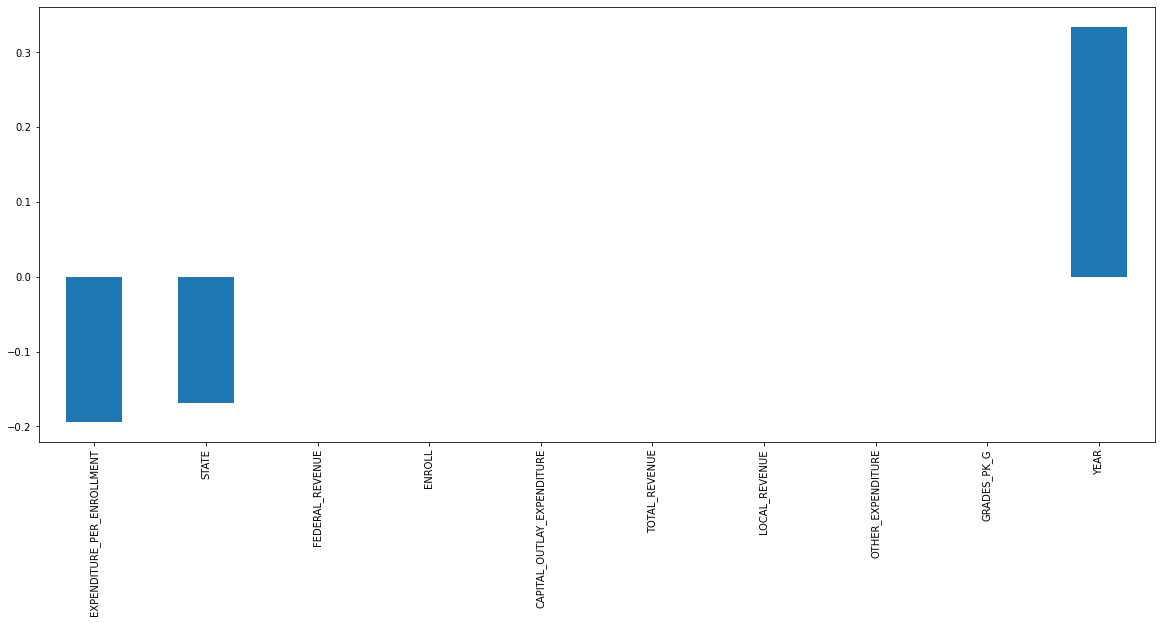

In [ ]:
feature_importance = pd.Series(index = X_edu.columns, data = elastic_net_optimal_model.coef_)

n_selected_features = (feature_importance!=0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (20,8))

### Additional Analysis

#### Using Math 8 to predict Reading 8

In [ ]:
df = pd.read_csv('us_education_final.csv')
target = df['AVG_READING_8_SCORE']

te_features = ['STATE']
num_features = ['YEAR','ENROLL','TOTAL_REVENUE', 'FEDERAL_REVENUE', 
                'LOCAL_REVENUE' ,'OTHER_EXPENDITURE', 
                'CAPITAL_OUTLAY_EXPENDITURE','GRADES_PK_G', 
                'EXPENDITURE_PER_ENROLLMENT','AVG_MATH_8_SCORE']

df = df[num_features+te_features]

In [ ]:
X_dev, X_test, y_dev, y_test = train_test_split(df, target, test_size=0.2,random_state=42) 
preprocess = make_column_transformer((StandardScaler(),num_features),remainder='passthrough')
pipe = make_pipeline(preprocess, ElasticNet())

cv_results = cross_validate(pipe[-1], X_dev, y_dev, cv=10, return_estimator=True,scoring =['r2','neg_mean_squared_error'])

In [ ]:
print(cv_results['test_r2'].mean())
print(-cv_results['test_neg_mean_squared_error'].mean())

0.7691022756683678
8.889266130051896


<AxesSubplot:>

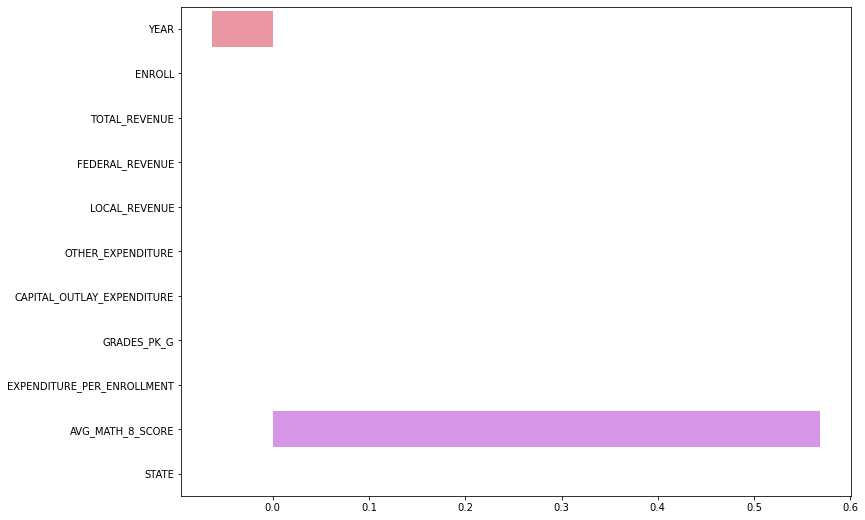

In [ ]:
best_model = np.argmax(cv_results['test_r2'])
coefs = cv_results['estimator'][best_model].coef_
fig = plt.figure(figsize=(12,9))
sns.barplot(y=df.columns, x=coefs, orient='h')

In [ ]:
y_pred = cv_results['estimator'][best_model].predict(X_test)
print("Mean squared error: %.5f" % mean_squared_error(y_test, y_pred))
print("R-squared: %.5f" % r2_score(y_test, y_pred))

Mean squared error: 8.49565
R-squared: 0.74921


In [ ]:
#Tuning
search = GridSearchCV(elastic_net_model, grid, cv=10,scoring='r2', n_jobs=-1)
results = search.fit(X_dev, y_dev)
print(results.best_score_)
print(results.best_params_)

0.7700857311365648
{'alpha': 0.1, 'l1_ratio': 0.0}


C:\Users\Ziyao Zhou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.843e+03, tolerance: 5.242e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [ ]:
elastic_net_optimal_model = ElasticNet(alpha = 0.1, l1_ratio = 0.0)
elastic_net_optimal_model.fit(X_dev,y_dev)

C:\Users\Ziyao Zhou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.843e+03, tolerance: 5.242e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.1, l1_ratio=0.0)

In [ ]:
y_pred_opt = search.predict(X_test)
print(mean_squared_error(y_test,y_pred_opt))

8.591438107018849


In [ ]:
elastic_net_optimal_model.coef_

array([-7.90771348e-02,  1.66019951e-07, -1.36334181e-07, -1.12997601e-06,
        6.06804125e-07,  2.72533222e-06, -1.31126561e-06, -1.56567465e-05,
        8.09254663e-02,  5.83177720e-01, -1.58583375e-01])

11 features, reduction of 0.00%


<AxesSubplot:>

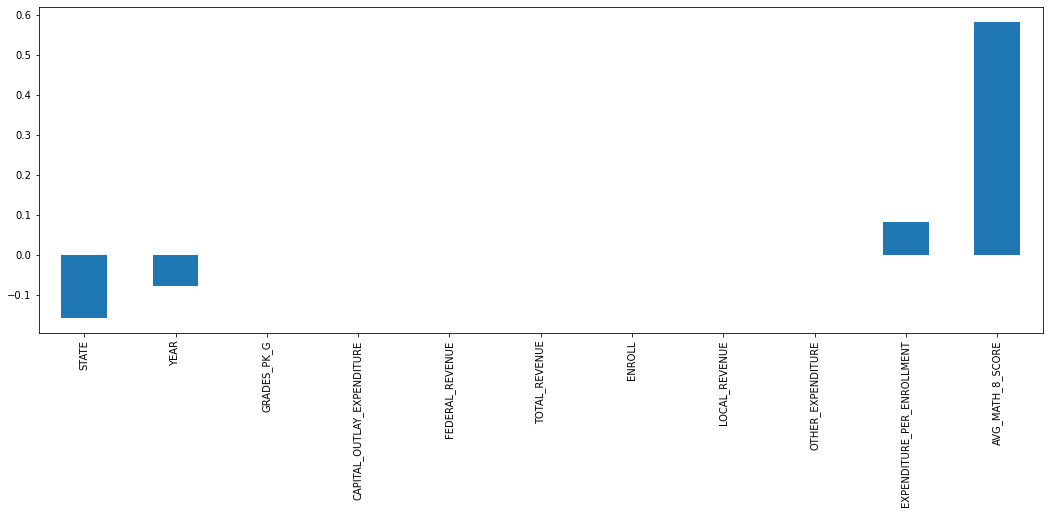

In [ ]:
feature_importance = pd.Series(index = X_dev.columns, data = elastic_net_optimal_model.coef_)

n_selected_features = (feature_importance!=0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (18,6))

#### Using reading 4 to predict math 4 

In [ ]:
df = pd.read_csv('us_education_final.csv')

target = df['AVG_MATH_4_SCORE']

te_features = ['STATE']
num_features = ['YEAR','ENROLL','TOTAL_REVENUE', 'FEDERAL_REVENUE', 
                'LOCAL_REVENUE' ,'OTHER_EXPENDITURE', 
                'CAPITAL_OUTLAY_EXPENDITURE','GRADES_PK_G', 
                'EXPENDITURE_PER_ENROLLMENT','AVG_READING_4_SCORE']

df = df[num_features+te_features]

In [ ]:
X_dev, X_test, y_dev, y_test = train_test_split(df, target, test_size=0.2,random_state=42) 
preprocess = make_column_transformer((StandardScaler(),num_features),remainder='passthrough')
pipe = make_pipeline(preprocess, ElasticNet())

cv_results = cross_validate(pipe[-1], X_dev, y_dev, cv=10, return_estimator=True,scoring =['r2','neg_mean_squared_error'])

In [ ]:
print(cv_results['test_r2'].mean())
print(-cv_results['test_neg_mean_squared_error'].mean())

0.6683234244375258
17.185427709273316


<AxesSubplot:>

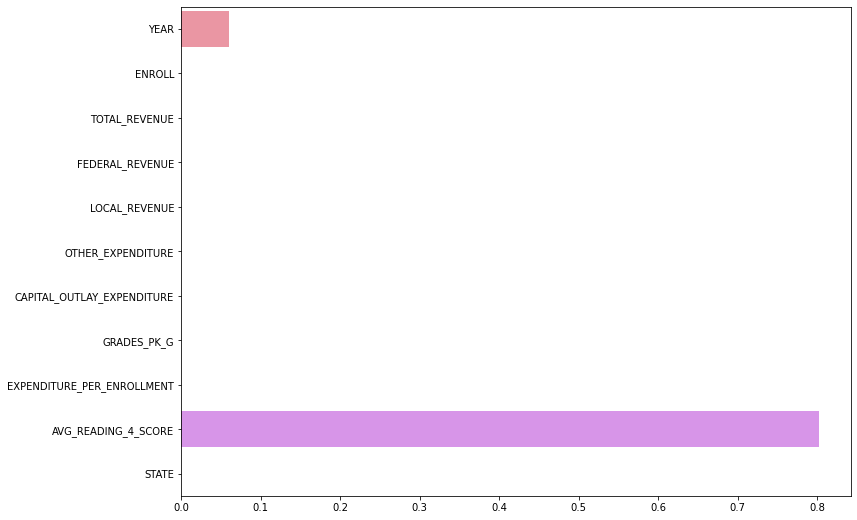

In [ ]:
best_model = np.argmax(cv_results['test_r2'])
coefs = cv_results['estimator'][best_model].coef_
fig = plt.figure(figsize=(12,9))
sns.barplot(y=df.columns, x=coefs, orient='h')

In [ ]:
y_pred = cv_results['estimator'][best_model].predict(X_test)
print("Mean squared error: %.5f" % mean_squared_error(y_test, y_pred))
print("R-squared: %.5f" % r2_score(y_test, y_pred))

Mean squared error: 17.82110
R-squared: 0.62597


In [ ]:
#Tuning
search = GridSearchCV(elastic_net_model, grid, cv=10,scoring='r2', n_jobs=-1)
results = search.fit(X_dev, y_dev)
print(results.best_score_)
print(results.best_params_)

0.6701649794841373
{'alpha': 0.1, 'l1_ratio': 0.08}


In [ ]:
elastic_net_optimal_model = ElasticNet(alpha = 0.1, l1_ratio = 0.08)
elastic_net_optimal_model.fit(X_dev,y_dev)

ElasticNet(alpha=0.1, l1_ratio=0.08)

In [ ]:
y_pred_opt = search.predict(X_test)
print(mean_squared_error(y_test,y_pred_opt))

18.205701896975736


In [ ]:
elastic_net_optimal_model.coef_

array([ 9.09779400e-02, -9.53861757e-07,  9.94067836e-08,  4.44633003e-07,
       -2.51046122e-07, -1.19364074e-06,  9.42614087e-07,  1.33792420e-05,
       -2.01380166e-01,  8.31993972e-01,  2.55552704e-01])

11 features, reduction of 0.00%


<AxesSubplot:>

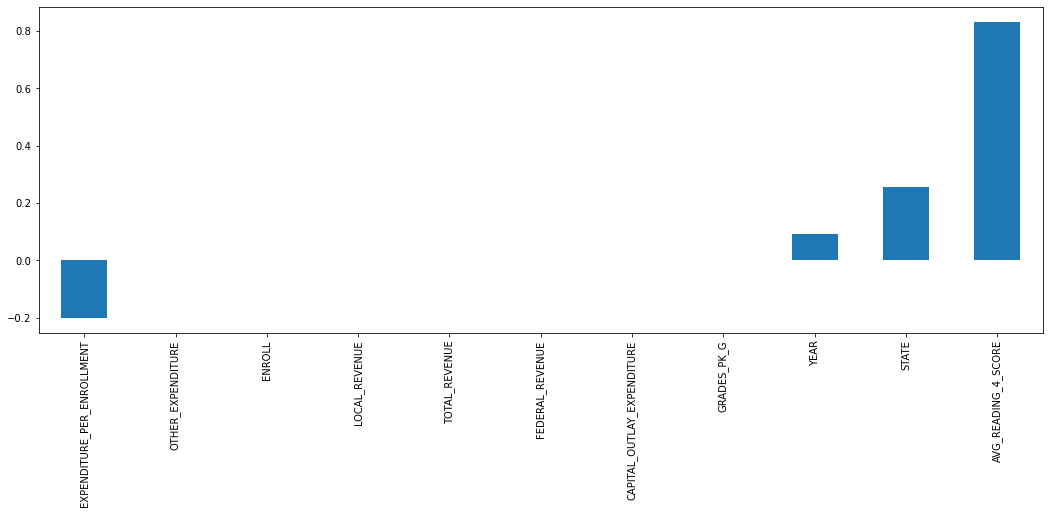

In [ ]:
feature_importance = pd.Series(index = X_dev.columns, data = elastic_net_optimal_model.coef_)

n_selected_features = (feature_importance!=0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (18,6))

## Random Forest

In [ ]:
df = pd.read_csv("us_education_final.csv")

In [ ]:
X = df.drop(['TOTAL_SCORE', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'], axis = 1)
y = df['TOTAL_SCORE']

In [ ]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_dev.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,LOCAL_REVENUE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,EXPENDITURE_PER_ENROLLMENT
163,8.836982,1995,1270948.0,7052825.0,458452.0,2942239.0,442434.0,898969.0,22621.0,5.737660
522,6.505544,2002,244937.0,1625444.0,138930.0,498128.0,67785.0,167918.0,2517.0,6.801859
575,9.547275,2003,999713.0,8246076.0,582940.0,3093213.0,377679.0,859389.0,5561.0,9.780527
266,9.867800,1997,187653.0,1213792.0,95795.0,29587.0,105850.0,123704.0,606.0,6.615269
148,9.753728,1994,1044721.0,6125739.0,372866.0,3353229.0,314439.0,587495.0,3115.0,6.007692


In [ ]:
gsc = GridSearchCV(estimator=RandomForestRegressor(),
                   param_grid={'max_depth': (3, 6, 9, 12, 15),
                               'n_estimators': (10, 50, 100, 500, 1000),},
                   cv=10, scoring='r2', verbose=0, n_jobs=-1)
grid_result = gsc.fit(X_dev, y_dev)
best_params = grid_result.best_params_

In [ ]:
best_params

{'max_depth': 15, 'n_estimators': 1000}

In [ ]:
random_forest_model = RandomForestRegressor(max_depth=best_params["max_depth"], 
                                            n_estimators=best_params["n_estimators"],
                                            random_state=False, verbose=False)

In [ ]:
scores = cross_validate(random_forest_model, X_dev, y_dev, cv=10, 
                        scoring=['neg_mean_squared_error', 'r2'])

In [ ]:
scores['test_neg_mean_squared_error'].mean(), scores['test_r2'].mean()

(-86.04339711496415, 0.8868173496000715)

In [ ]:
random_forest_model = RandomForestRegressor(max_depth=best_params["max_depth"],
                                            n_estimators=best_params["n_estimators"]).fit(X_dev, y_dev)                         

In [ ]:
mean_squared_error(y_test, random_forest_model.predict(X_test))

81.9851687782819

In [ ]:
r2_score(y_test, random_forest_model.predict(X_test))

0.8769043396288662

In [ ]:
pd.DataFrame({"predicted": random_forest_model.predict(X_test), "target":y_test})

,predicted,target
1394,994.060894,994.361305
743,1033.338670,1033.797475
1606,1017.544716,1017.674242
49,1012.628486,997.800000
188,1010.724939,1012.586364
...,...,...
226,994.750387,991.863636
231,1011.181344,1011.016667
651,985.426929,991.479604
1433,991.220515,979.696970


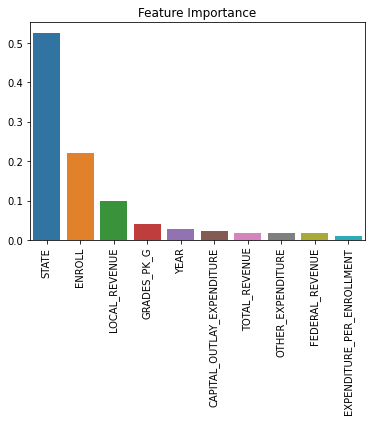

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
feature_names = X_dev.columns
feat_imps = zip(feature_names, random_forest_model.feature_importances_)
feats, imps = zip(*(sorted(list(filter(lambda x:x[1]!=0, feat_imps)),
key = lambda x:x[1], reverse = True)))
ax = sns.barplot(x=list(feats), y=list(imps))
ax.tick_params(axis='x', rotation=90)
plt.title("Feature Importance")
plt.show()

Random Forest performs well when we try to predict the total score. After doing a 10 fold grid search cross validation to select the best parameters, we ended up chosing max_depth being 15 and n_estimators being 1000 as the best parameters for the model. 

Using this model:

The MSE and R^2 are 81.99 and 0.88 on test set.

The MSE and R^2 are 86.04 and 0.89 on cross validation on average.

The top three most important features are STATE, followed by ENROLL and LOCAL_REVENUE.

### Additional analysis on math and reading scores predicability

Use 4th grade reading score to predict 4th grade math score

In [ ]:
X = df.drop(['TOTAL_SCORE', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_8_SCORE'], axis = 1)
y = df['AVG_MATH_4_SCORE']

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gsc = GridSearchCV(estimator=RandomForestRegressor(),
                   param_grid={'max_depth': (3, 6, 9, 12, 15),
                               'n_estimators': (10, 50, 100, 500, 1000),},
                   cv=10, scoring='r2', verbose=0, n_jobs=-1)
grid_result = gsc.fit(X_dev, y_dev)
best_params = grid_result.best_params_

In [ ]:
best_params

{'max_depth': 12, 'n_estimators': 500}

In [ ]:
random_forest_model = RandomForestRegressor(max_depth=best_params["max_depth"], 
                                            n_estimators=best_params["n_estimators"],
                                            random_state=False, verbose=False)
scores = cross_validate(random_forest_model, X_dev, y_dev, cv=10, 
                        scoring=['neg_mean_squared_error', 'r2'])
scores['test_neg_mean_squared_error'].mean(), scores['test_r2'].mean()

(-9.970186600733813, 0.8095093233419617)

In [ ]:
random_forest_model = RandomForestRegressor(max_depth=best_params["max_depth"],
                                            n_estimators=best_params["n_estimators"]).fit(X_dev, y_dev)    
mean_squared_error(y_test, random_forest_model.predict(X_test))                                            

10.773220231489356

In [ ]:
r2_score(y_test, random_forest_model.predict(X_test))

0.7738905376153584

In [ ]:
pd.DataFrame({"predicted": random_forest_model.predict(X_test), "target":y_test})

,predicted,target
1394,233.725839,233.636364
743,246.843012,246.300000
1606,242.264790,242.333333
49,239.491429,229.000000
188,239.319290,239.454545
...,...,...
226,234.453283,234.363636
231,238.259694,238.000000
651,234.612864,234.090909
1433,234.274831,234.363636


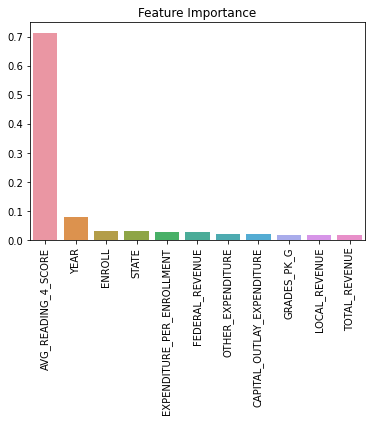

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
feature_names = X_dev.columns
feat_imps = zip(feature_names, random_forest_model.feature_importances_)
feats, imps = zip(*(sorted(list(filter(lambda x:x[1]!=0, feat_imps)),
key = lambda x:x[1], reverse = True)))
ax = sns.barplot(x=list(feats), y=list(imps))
ax.tick_params(axis='x', rotation=90)
plt.title("Feature Importance")
plt.show()

Random Forest performs quite good when we try to predict 4th grade math score after including 4th grade reading score. After doing a 10 fold grid search cross validation to select the best parameters, we ended up chosing max_depth being 12 and n_estimators being 500 as the best parameters for the model. 

Using this model:

The MSE and R^2 are 10.77 and 0.77 on test set.

The MSE and R^2 are 9.97 and 0.81 on cross validation on average.

The most important feature is AVERSGE_READING_4_SCORE, followed by YEAR.

Use 8th grade math score to predict 8th grade reading score

In [ ]:
X = df.drop(['TOTAL_SCORE', 'AVG_READING_4_SCORE', 'AVG_MATH_4_SCORE', 'AVG_READING_8_SCORE'], axis = 1)
y = df['AVG_READING_8_SCORE']

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gsc = GridSearchCV(estimator=RandomForestRegressor(),
                   param_grid={'max_depth': (3, 6, 9, 12, 15),
                               'n_estimators': (10, 50, 100, 500, 1000),},
                   cv=10, scoring='r2', verbose=0, n_jobs=-1)
grid_result = gsc.fit(X_dev, y_dev)
best_params = grid_result.best_params_

In [ ]:
best_params

{'max_depth': 15, 'n_estimators': 1000}

In [ ]:
random_forest_model = RandomForestRegressor(max_depth=best_params["max_depth"], 
                                            n_estimators=best_params["n_estimators"],
                                            random_state=False, verbose=False)
scores = cross_validate(random_forest_model, X_dev, y_dev, cv=10, 
                        scoring=['neg_mean_squared_error', 'r2'])
scores['test_neg_mean_squared_error'].mean(), scores['test_r2'].mean()

(-3.203707587470993, 0.9168240311092903)

In [ ]:
random_forest_model = RandomForestRegressor(max_depth=best_params["max_depth"],
                                            n_estimators=best_params["n_estimators"]).fit(X_dev, y_dev)    
mean_squared_error(y_test, random_forest_model.predict(X_test))   

2.8703621594087743

In [ ]:
r2_score(y_test, random_forest_model.predict(X_test))

0.9152673723492614

In [ ]:
pd.DataFrame({"predicted": random_forest_model.predict(X_test), "target":y_test})

,predicted,target
1394,265.533729,265.545455
743,271.250606,271.777778
1606,267.047861,267.090909
49,264.332191,266.800000
188,267.614466,267.700000
...,...,...
226,263.620493,263.500000
231,267.587656,267.600000
651,262.064504,262.818182
1433,265.350151,263.500000


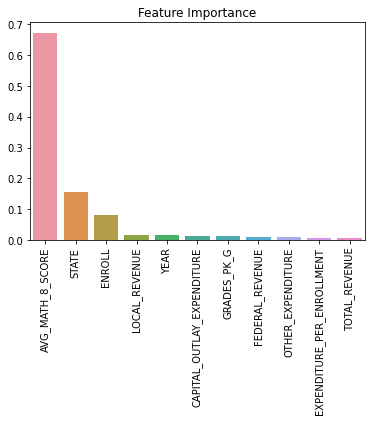

In [ ]:
feature_names = X_dev.columns
feat_imps = zip(feature_names, random_forest_model.feature_importances_)
feats, imps = zip(*(sorted(list(filter(lambda x:x[1]!=0, feat_imps)),
key = lambda x:x[1], reverse = True)))
ax = sns.barplot(x=list(feats), y=list(imps))
ax.tick_params(axis='x', rotation=90)
plt.title("Feature Importance")
plt.show()

Random Forest performs well when we try to predict 8th grade reading score after including 8th grade math score. After doing a 10 fold grid search cross validation to select the best parameters, we ended up chosing max_depth being 15 and n_estimators being 1000 as the best parameters for the model.

Using this model:

The MSE and R^2 are 2.87 and 0.92 on test set.

The MSE and R^2 are 3.20 and 0.92 on cross validation on average.

The most important feature is AVERSGE_MATH_8_SCORE, followed by STATE and ENROLL.

## XGBoost Regressor

In [ ]:
import xgboost

In [ ]:
X = df.drop(["TOTAL_SCORE", 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'], axis = 1)
y = df["TOTAL_SCORE"]

from sklearn.model_selection import train_test_split
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Bayesian Hyperparameter tuning on a search space for the XGBoost Regressor using HYPEROPT

In [ ]:
from hyperopt import hp, STATUS_OK

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,10),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

def objective(space):
    model = XGBRegressor(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_dev, y_dev), ( X_test, y_test)]
    
    model.fit(X_dev, y_dev,
            eval_set=evaluation, eval_metric=["rmse"],
            verbose=False)
    

    y_pred = model.predict(X_test)
    loss = mean_squared_error(y_test, y_pred)
    print ("SCORE:", loss)
    return {'loss': loss, 'status': STATUS_OK, 'model':model }

from hyperopt import Trials, fmin, tpe
from sklearn.metrics import mean_squared_error
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

print(best_hyperparams)

[19:16:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SCORE:
93.03008670521001
[19:16:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SCORE:
122.54970602916931
[19:16:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SCORE:
73.74967368187413
[19:16:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SCORE:
93.44740006640669
[19:16:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SCORE:
74.69267630397881
[19:16:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SCORE:
72.57318537202937
[19:16:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now d

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold
from numpy import absolute
from sklearn.metrics import r2_score, mean_squared_error

# Training using cross validation with the best hyperparameters
xgb_model = XGBRegressor(random_state = 42)
cv = RepeatedKFold(n_splits=10)
scores = cross_validate(xgb_model, X, y, scoring=["r2", 'neg_mean_squared_error'], cv=cv, return_estimator=True)
print(" Mean R^2 score after cross-validation: ", scores['test_r2'].mean())
print("Mean MSE after cross-validation: ", -scores['test_neg_mean_squared_error'].mean())

best_xgb_model = XGBRegressor(colsample_bytree = best_hyperparams['colsample_bytree'],
             gamma = best_hyperparams['gamma'],
             max_depth = int(best_hyperparams['max_depth']),
             min_child_weight = best_hyperparams['min_child_weight'],
             reg_alpha = best_hyperparams['reg_alpha'] ,
             reg_lambda = best_hyperparams['reg_lambda'],
             random_state = 42)

best_xgb_model.fit(X_dev, y_dev)
y_pred = best_xgb_model.predict(X_test)

# The mean squared error
print("Mean squared error on test set: %.2f" % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 
print("Coefficient of determination on test set: %.2f" % r2_score(y_test, y_pred))

[19:16:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:16:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:16:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:16:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:16:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:16:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:16:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:16:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

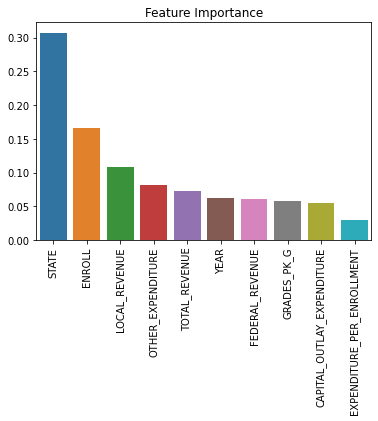

In [ ]:
# Feature importance plot
import seaborn as sns
import matplotlib.pyplot as plt
feature_names = X_dev.columns
feat_imps = zip(feature_names, best_xgb_model.feature_importances_)
feats, imps = zip(*(sorted(list(filter(lambda x:x[1]!=0, feat_imps)),
key = lambda x:x[1], reverse = True)))
ax = sns.barplot(x=list(feats), y=list(imps))
ax.tick_params(axis='x', rotation=90)
plt.title("Feature Importance")
plt.show()

Observation:

We can see here that the XGBoost model is able to understand the dependencies between the features and weight them appropriately to get good performance as compared to other linear models. We have performed Bayesian Hyperparamater Optimisation using the hyperopt package in order to arrive at the most optimal hyperparameter set and that model is evaluated on the test set in order to receive the performance values.

The feature importance map looks good as all features are contributing to the final result in some way or the other with the STATE feature contributing the most

The MSE and R^2 are 49.5 and 0.93 on test set.

The MSE and R^2 are 118.42 and 0.837 on cross validation on average.

### Additional Analysis: Training on AVG_MATH_8_SCORE to predict AVG_READING_8_SCORE

In [ ]:
X = df.drop(["TOTAL_SCORE",'AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE', "AVG_READING_8_SCORE"], axis = 1)
y = df["AVG_READING_8_SCORE"]

from sklearn.model_selection import train_test_split
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from hyperopt import hp, STATUS_OK

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,10),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

def objective(space):
    model = XGBRegressor(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_dev, y_dev), ( X_test, y_test)]
    
    model.fit(X_dev, y_dev,
            eval_set=evaluation, eval_metric=["rmse"],
            verbose=False)
    

    y_pred = model.predict(X_test)
    loss = mean_squared_error(y_test, y_pred)
    print ("SCORE:", loss)
    return {'loss': loss, 'status': STATUS_OK, 'model':model }

from hyperopt import Trials, fmin, tpe
from sklearn.metrics import mean_squared_error
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

print(best_hyperparams)

[19:17:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SCORE:
5.370140311118742
[19:17:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SCORE:
5.0479743697658686
[19:17:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SCORE:
7.140799266380605
[19:17:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SCORE:
4.754046987899927
[19:17:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SCORE:
5.116109194539001
[19:17:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SCORE:
6.103842124695152
[19:17:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now d

In [ ]:
# Training using cross validation with the best hyperparameters
xgb_model = XGBRegressor(random_state = 42)
cv = RepeatedKFold(n_splits=10)
scores = cross_validate(xgb_model, X, y, scoring=["r2", 'neg_mean_squared_error'], cv=cv, return_estimator=True)
print(" Mean R^2 score after cross-validation: ", scores['test_r2'].mean())
print("Mean MSE after cross-validation: ", -scores['test_neg_mean_squared_error'].mean())

best_xgb_model = XGBRegressor(colsample_bytree = best_hyperparams['colsample_bytree'],
             gamma = best_hyperparams['gamma'],
             max_depth = int(best_hyperparams['max_depth']),
             min_child_weight = best_hyperparams['min_child_weight'],
             reg_alpha = best_hyperparams['reg_alpha'] ,
             reg_lambda = best_hyperparams['reg_lambda'],
             random_state = 42)

best_xgb_model.fit(X_dev, y_dev)
y_pred = best_xgb_model.predict(X_test)

# The mean squared error
print("Mean squared error on test set: %.2f" % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 
print("Coefficient of determination on test set: %.2f" % r2_score(y_test, y_pred))

[19:18:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:18:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:18:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:18:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:18:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:18:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:18:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:18:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

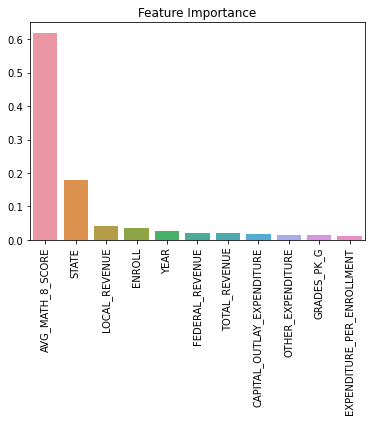

In [ ]:
# Feature importance plot
import seaborn as sns
import matplotlib.pyplot as plt
feature_names = X_dev.columns
feat_imps = zip(feature_names, best_xgb_model.feature_importances_)
feats, imps = zip(*(sorted(list(filter(lambda x:x[1]!=0, feat_imps)),
key = lambda x:x[1], reverse = True)))
ax = sns.barplot(x=list(feats), y=list(imps))
ax.tick_params(axis='x', rotation=90)
plt.title("Feature Importance")
plt.show()

Observation:

When it comes to predicting AVG_READING_8_SCORE from AVG_MATH_8_SCORE, the model performs a bit less. This analysis was primarily done in order to check the feature importance map and see ehich features contribute to AVG_READING_8_SCORE. It can be seen that AVG_MATH_8_SCORE is the feature that is correlated the most followed by STATE and the other feature contributes relatively less.

This analysis helps us reaasure ourselves that dropping the AVG scores to predict the TOTAL_SCORE was indeed the right choice because in the case where we don't drop them, the tatget variable would be highly correlated to them and the model would hence overfit and give us a perfect 1 R2 score (which we generally prefer to avoid)

The MSE and R^2 are 3.29 and 0.90 on test set.

The MSE and R^2 are 3.56 and 0.90 on cross validation on average.